In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Carga de Datos y Generalidades

In [154]:
mi = pd.read_csv("Mortalidad Infantil.csv",sep=";")
mi.head()

Año            Área  Nacimientos  Población Tasa general de fecundidad  \
0  2012  Antonio Nariño         1114      24115                       46,2   
1  2013  Antonio Nariño         1335      23613                       56,5   
2  2014  Antonio Nariño         1277      23175                       55,1   
3  2015  Antonio Nariño         1191      22786                       52,3   
4  2016  Antonio Nariño         1221      22481                       54,3   

  Tasa global de fecundidad            Columna1  Muertes < 1  \
0                       1,5  Antonio Nariño2012           16   
1                       1,9  Antonio Nariño2013           14   
2                       1,8  Antonio Nariño2014           12   
3                       1,7  Antonio Nariño2015           11   
4                       1,8  Antonio Nariño2016           19   

   Nacidos Vivos <1 Tasa por mil <1  ...  Partos Espontaneos  Partos Cesarea  \
0              1120            14,3  ...                 673             411   
1              1341            10,4  ...                 740             565   
2              1280             9,4  ...                 696             553   
3              1195             9,2  ...                 646             521   
4              1225            15,5  ...                 686             515   

  Partos Instrumentados  Partos Ignorados  Madres R. Contributivo  \
0                    36                 0                     785   
1                    36                 0                     962   
2                    31                 0                     926   
3                    28                 0                     894   
4                    24                 0                     970   

   Madres R. Especial Madres R. Excepcion  Madres R. No Asegurado  \
0                   1                  35                     108   
1                   0                  41                      92   
2                   0                  46                      79   
3                   0                  35                      47   
4                   0                  36                      32   

   Madres R. Subsidiado Tasa de Pobreza  
0                   191            #N/D  
1                   246            #N/D  
2                   229            8,09  
3                   219            #N/D  
4                   187            #N/D  

[5 rows x 34 columns]

Inicialmente se eliminan columnas que se conoce no son útiles y se filtra hasta las columnas a las que se les realizará el análisis

In [155]:
mi.drop("Columna1",axis=1,inplace=True)

In [156]:
mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Año                             220 non-null    int64 
 1   Área                            220 non-null    object
 2   Nacimientos                     220 non-null    int64 
 3   Población                       220 non-null    int64 
 4   Tasa general de fecundidad      220 non-null    object
 5   Tasa global de fecundidad       220 non-null    object
 6   Muertes < 1                     220 non-null    int64 
 7   Nacidos Vivos <1                220 non-null    int64 
 8   Tasa por mil <1                 220 non-null    object
 9   Nacidos Con Bajo Peso           220 non-null    int64 
 10  Nacidos Vivos                   220 non-null    int64 
 11  Porcentaje Bajo Peso al Nacer   220 non-null    object
 12  Muertes Maternas                220 non-null    in

Se observa que las variables 'Tasa general de fecundidad', 'Tasa global de fecundidad' y 'Tasa por mil < 1' no están en la tipología deseada

In [157]:
mi[["Tasa general de fecundidad","Tasa global de fecundidad","Tasa por mil <1"]].head()

Tasa general de fecundidad Tasa global de fecundidad Tasa por mil <1
0                       46,2                       1,5            14,3
1                       56,5                       1,9            10,4
2                       55,1                       1,8             9,4
3                       52,3                       1,7             9,2
4                       54,3                       1,8            15,5

Se observa que en todos los casos los valores son leídos como ',', por lo que se deben reemplazar

In [158]:
mi["Tasa general de fecundidad"] = mi["Tasa general de fecundidad"].str.replace(",",".")
mi["Tasa global de fecundidad"] = mi["Tasa global de fecundidad"].str.replace(",",".")
mi["Tasa por mil <1"] = mi["Tasa por mil <1"].str.replace(",",".")
mi["Tasa general de fecundidad"] = mi["Tasa general de fecundidad"].astype(float)
mi["Tasa global de fecundidad"] = mi["Tasa global de fecundidad"].astype(float)
mi["Tasa por mil <1"] = mi["Tasa por mil <1"].astype(float)

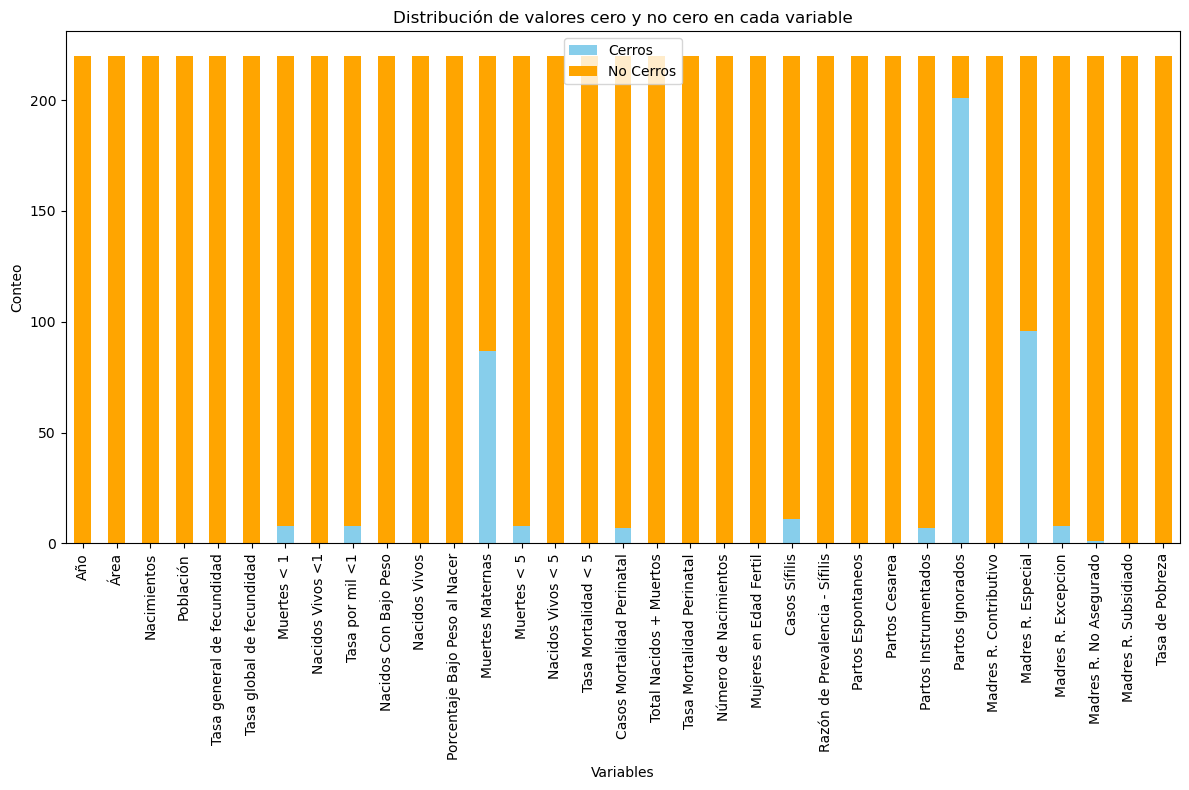

In [159]:
zero_counts = (mi == 0).sum()
non_zero_counts = (mi != 0).sum()

# Crear el DataFrame para el gráfico
count_df = pd.DataFrame({'Cerros': zero_counts, 'No Cerros': non_zero_counts})

# Plot
count_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.title('Distribución de valores cero y no cero en cada variable')
plt.xlabel('Variables')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Univariado

## Nacidos Vivos

In [160]:
mi["Nacidos Vivos"].describe()

count      220.000000
mean      4486.504545
std       4025.650360
min         19.000000
25%       1280.750000
50%       3081.500000
75%       6313.500000
max      15621.000000
Name: Nacidos Vivos, dtype: float64

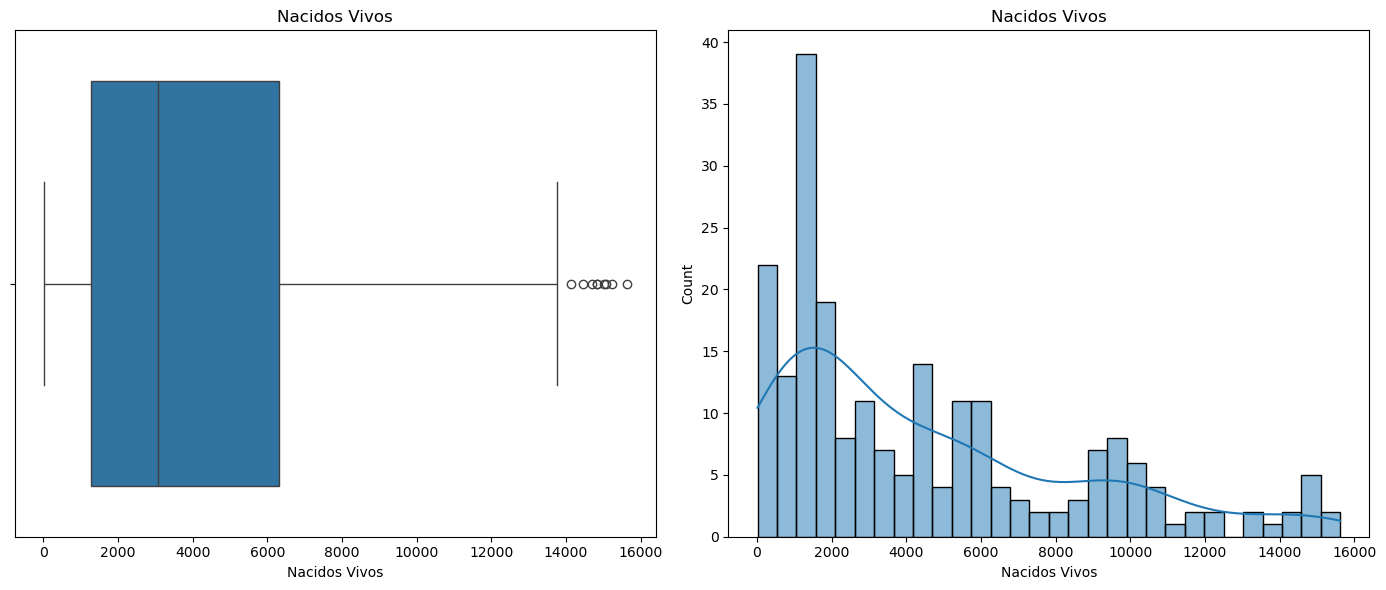

In [161]:
columna = 'Nacidos Vivos'
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=mi[columna])
plt.title('{}'.format(columna))

#Histograma
plt.subplot(1, 2, 2)
sns.histplot(mi[columna], bins=30, kde=True)
plt.title('{}'.format(columna))
plt.tight_layout()
plt.show()


## Porcentaje Bajo Peso al Nacer

#### Proporción de recién nacidos vivos con peso menor a 2.499 gr residentes en la ciudad de Bogotá D.C.

In [162]:
mi["Porcentaje Bajo Peso al Nacer"] = mi["Porcentaje Bajo Peso al Nacer"].str.replace(',', '')
mi["Porcentaje Bajo Peso al Nacer"] = mi["Porcentaje Bajo Peso al Nacer"].astype(float)
print(mi["Porcentaje Bajo Peso al Nacer"].dtype)

float64


In [163]:
mi["Porcentaje Bajo Peso al Nacer"].describe()

count    220.000000
mean     117.154545
std       43.284170
min       11.000000
25%      118.750000
50%      129.000000
75%      141.000000
max      184.000000
Name: Porcentaje Bajo Peso al Nacer, dtype: float64

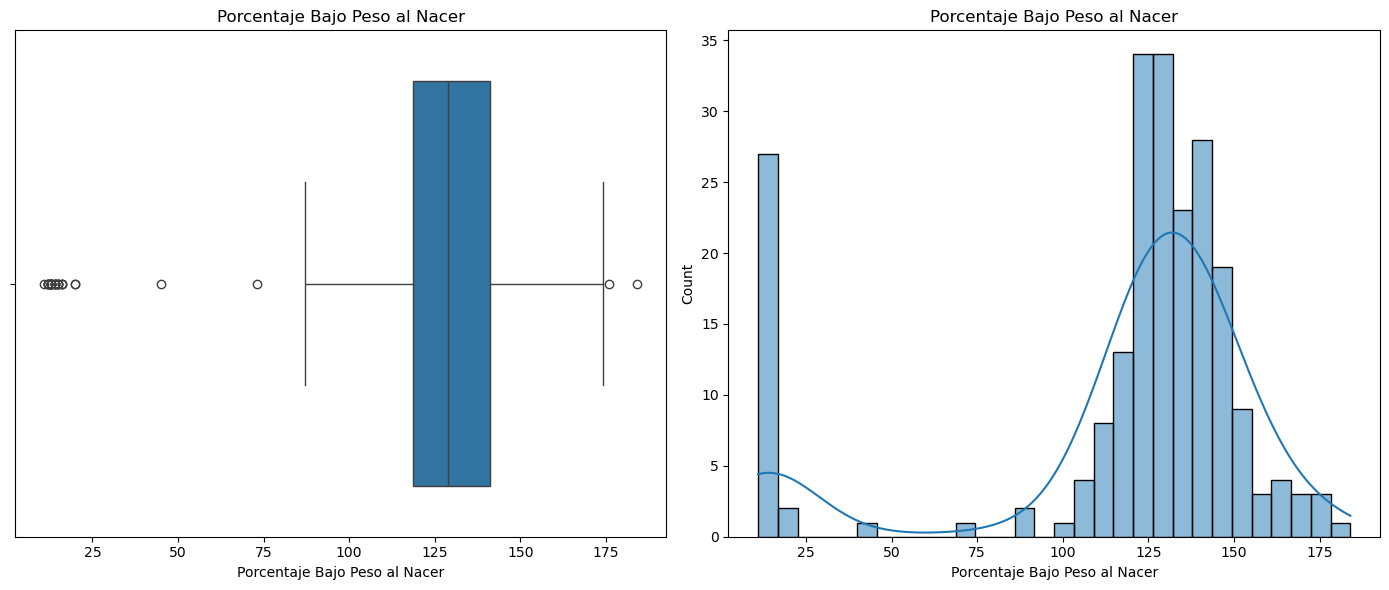

In [164]:
columna = 'Porcentaje Bajo Peso al Nacer'
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=mi[columna])
plt.title('{}'.format(columna))

#Histograma
plt.subplot(1, 2, 2)
sns.histplot(mi[columna], bins=30, kde=True)
plt.title('{}'.format(columna))
plt.tight_layout()
plt.show()

In [165]:
mi["Porcentaje Bajo Peso al Nacer"].max()

184.0

In [166]:
mi["Porcentaje Bajo Peso al Nacer"].min()

11.0

## Muertes Maternas

In [167]:
mi["Muertes Maternas"].describe()

count    220.000000
mean       1.431818
std        1.764668
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: Muertes Maternas, dtype: float64

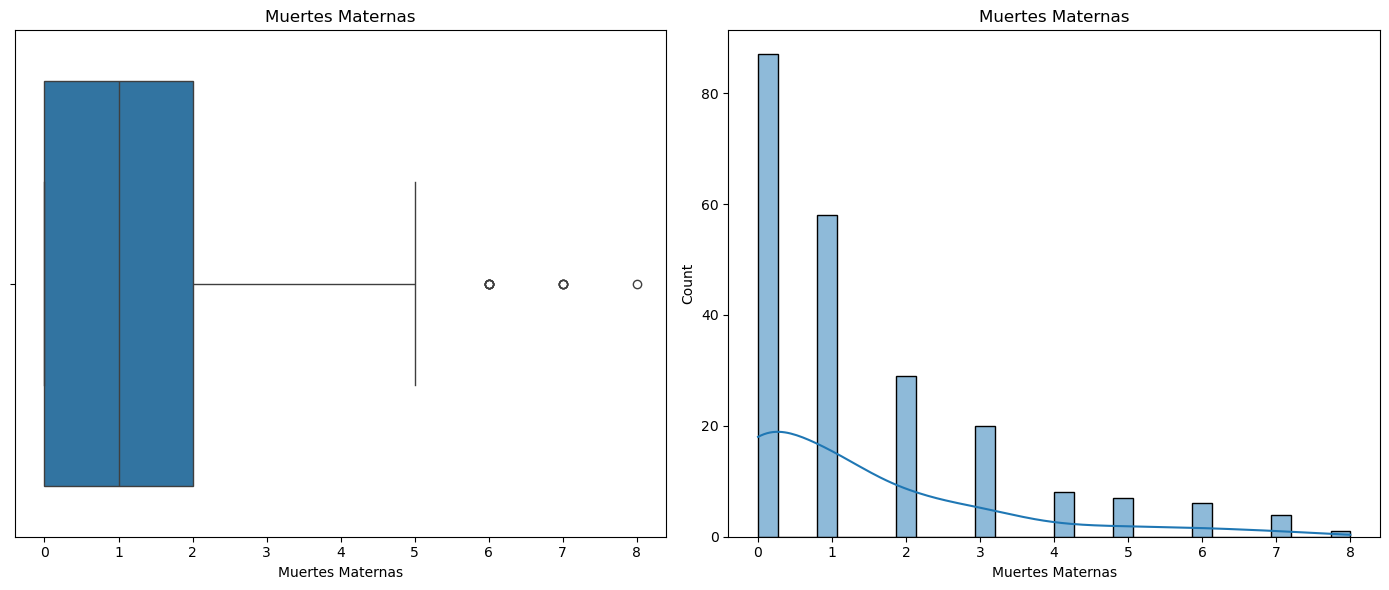

In [168]:
columna = 'Muertes Maternas'
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=mi[columna])
plt.title('{}'.format(columna))

#Histograma
plt.subplot(1, 2, 2)
sns.histplot(mi[columna], bins=30, kde=True)
plt.title('{}'.format(columna))
plt.tight_layout()
plt.show()

In [169]:
mi["Muertes Maternas"].max()

8

In [170]:
mi["Muertes Maternas"].min()

0

## Muertes < 5

In [171]:
mi["Muertes < 5"].describe()

count    220.000000
mean      49.690909
std       45.707277
min        0.000000
25%       14.000000
50%       32.000000
75%       73.250000
max      202.000000
Name: Muertes < 5, dtype: float64

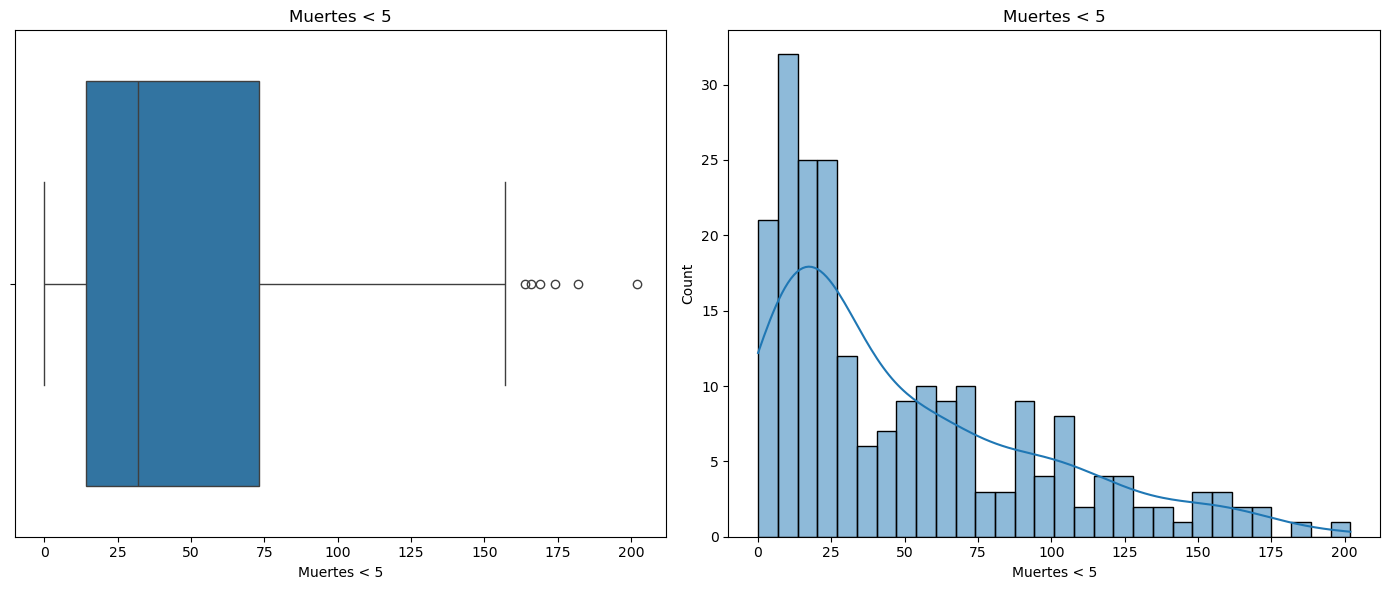

In [172]:
columna = 'Muertes < 5'
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=mi[columna])
plt.title('{}'.format(columna))

#Histograma
plt.subplot(1, 2, 2)
sns.histplot(mi[columna], bins=30, kde=True)
plt.title('{}'.format(columna))
plt.tight_layout()
plt.show()

In [173]:
mi["Muertes < 5"].max()

202

In [174]:
mi["Muertes < 5"].min()

0

## Nacidos Vivos < 5

In [175]:
mi["Nacidos Vivos < 5"].describe()

count      220.000000
mean      4486.504545
std       4025.650360
min         19.000000
25%       1280.750000
50%       3081.500000
75%       6313.500000
max      15621.000000
Name: Nacidos Vivos < 5, dtype: float64

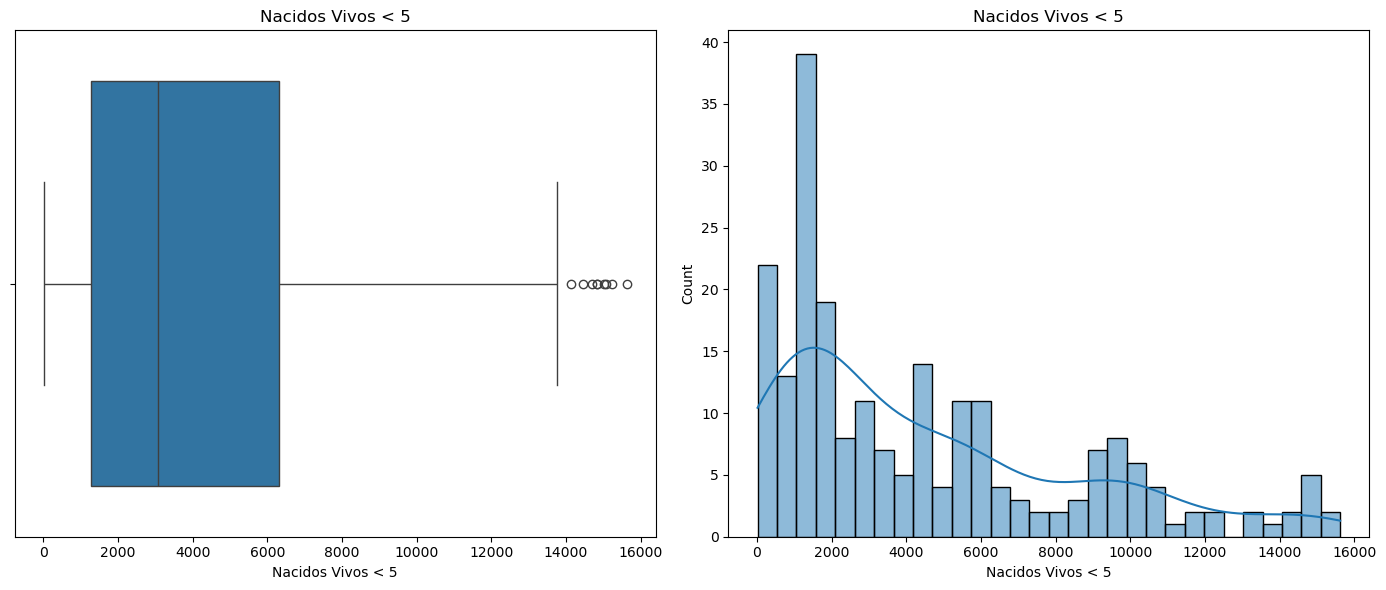

In [176]:
columna = 'Nacidos Vivos < 5'
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=mi[columna])
plt.title('{}'.format(columna))

#Histograma
plt.subplot(1, 2, 2)
sns.histplot(mi[columna], bins=30, kde=True)
plt.title('{}'.format(columna))
plt.tight_layout()
plt.show()

In [177]:
mi["Nacidos Vivos < 5"].max()

15621

In [178]:
mi["Nacidos Vivos < 5"].min()

19

## Relación entre Nacidos Vivos y Muertes < 5 años

In [179]:
correlacion = mi['Nacidos Vivos < 5'].corr(mi['Muertes < 5'])
print("Correlación ", correlacion)

Correlación  0.974475178310534


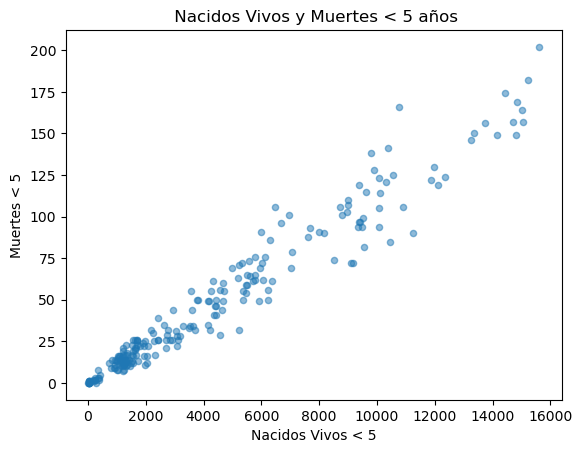

In [180]:
mi.plot(kind='scatter', x='Nacidos Vivos < 5', y='Muertes < 5', alpha=0.5)
plt.title(' Nacidos Vivos y Muertes < 5 años')
plt.show()

## Relación entre Nacidos Vivos y  Nacidos Vivos < 5 años

In [181]:
# intervalos
mi_x = mi.copy()
mi_x['Nacidos Vivos Binned'] = pd.cut(mi['Nacidos Vivos < 5'], bins=10)
mi_x['Nacidos Binned'] = pd.cut(mi['Nacidos Vivos'], bins=10)

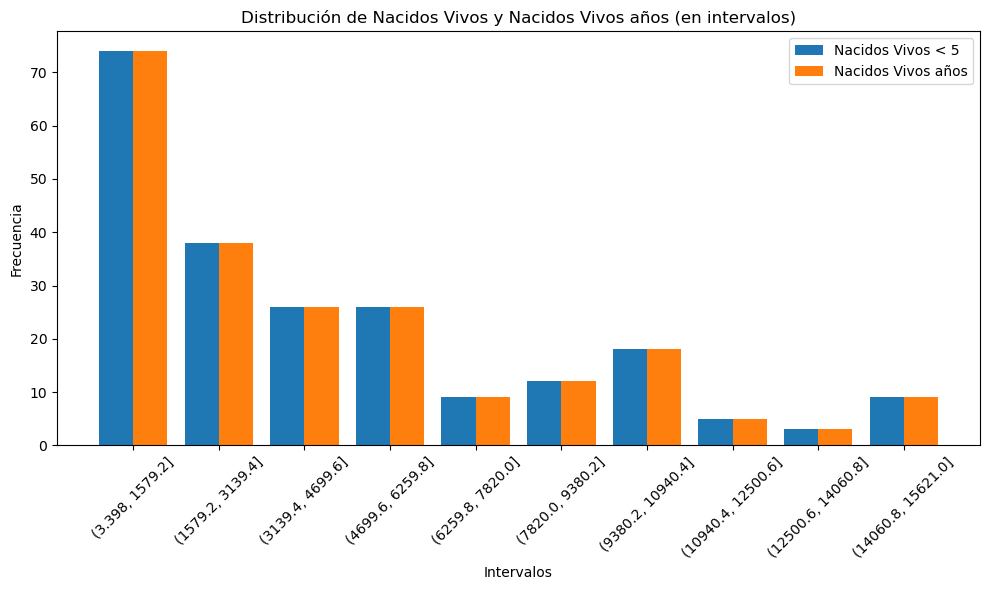

In [182]:
nacidos_vivos_counts = mi_x['Nacidos Vivos Binned'].value_counts().sort_index()
muertes_counts = mi_x['Nacidos Binned'].value_counts().sort_index()

width = 0.4
bins = range(len(nacidos_vivos_counts))
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(bins, nacidos_vivos_counts, width=width, label='Nacidos Vivos < 5', align='center')
ax.bar([x + width for x in bins], muertes_counts, width=width, label='Nacidos Vivos años', align='center')

ax.set_title('Distribución de Nacidos Vivos y Nacidos Vivos años (en intervalos)')
ax.set_xlabel('Intervalos')
ax.set_ylabel('Frecuencia')
ax.set_xticks([x + width / 2 for x in bins])
ax.set_xticklabels(nacidos_vivos_counts.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [183]:
correlacion = mi['Nacidos Vivos < 5'].corr(mi['Nacidos Vivos'])
print("Correlación ", correlacion)

Correlación  0.9999999999999999


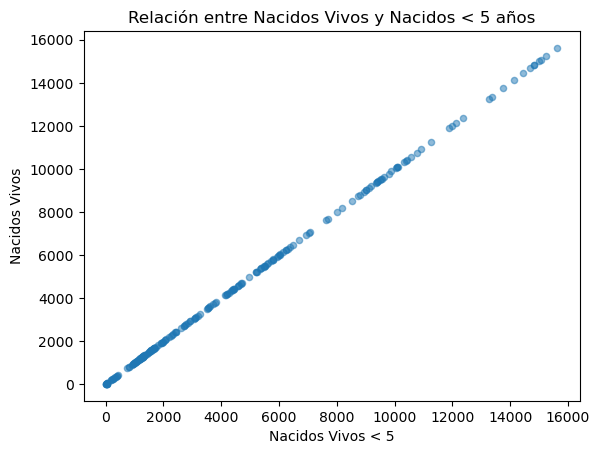

In [184]:
mi.plot(kind='scatter', x='Nacidos Vivos < 5', y='Nacidos Vivos', alpha=0.5)
plt.title('Relación entre Nacidos Vivos y Nacidos < 5 años')
plt.show()

Son los mismos valores

## Tasa Mortalidad < 5              

In [185]:
mi["Tasa Mortalidad < 5"] = mi["Tasa Mortalidad < 5"].str.replace(',', '')
mi["Tasa Mortalidad < 5"] = mi["Tasa Mortalidad < 5"].astype(float)
print(mi["Tasa Mortalidad < 5"].dtype)

float64


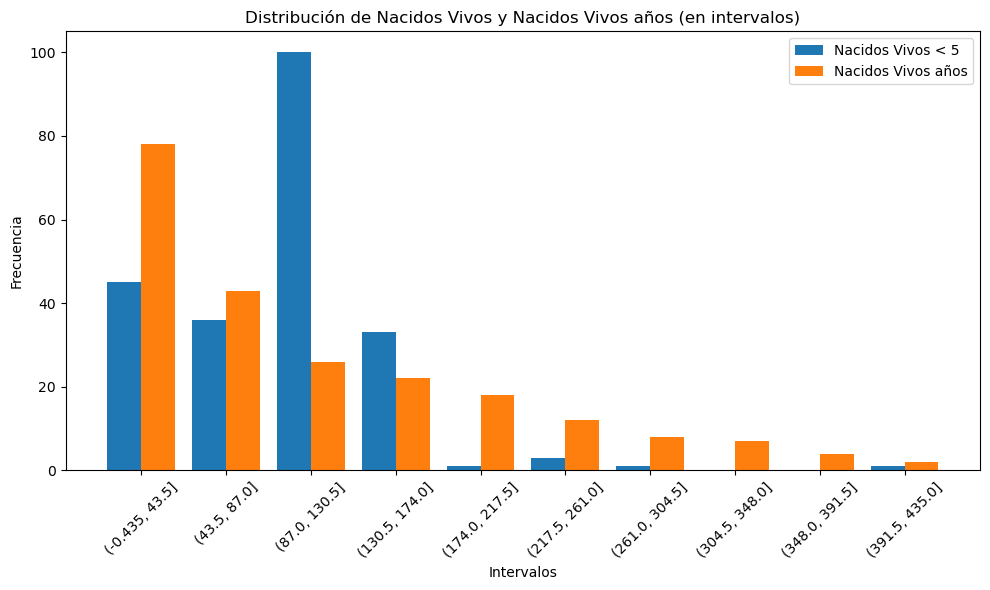

In [186]:
mi['Tasa Mortalidad Binned'] = pd.cut(mi['Tasa Mortalidad < 5'], bins=10)
mi['Muertes < 5 Binned'] = pd.cut(mi['Muertes < 5'], bins=10)

mortalidad = mi['Tasa Mortalidad Binned'].value_counts().sort_index()
muertes_counts = mi['Muertes < 5 Binned'].value_counts().sort_index()

width = 0.4
bins = range(len(mortalidad))
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(bins, mortalidad, width=width, label='Nacidos Vivos < 5', align='center')
ax.bar([x + width for x in bins], muertes_counts, width=width, label='Nacidos Vivos años', align='center')

ax.set_title('Distribución de Nacidos Vivos y Nacidos Vivos años (en intervalos)')
ax.set_xlabel('Intervalos')
ax.set_ylabel('Frecuencia')
ax.set_xticks([x + width / 2 for x in bins])
ax.set_xticklabels(mortalidad.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



In [187]:
correlacion = mi['Tasa Mortalidad < 5'].corr(mi['Muertes < 5'])
print("Correlación ", correlacion)

Correlación  0.03186985110058017


In [188]:
mi["Tasa Mortalidad < 5"].describe()

count    220.000000
mean      93.172727
std       56.059469
min        0.000000
25%       74.500000
50%      102.000000
75%      122.000000
max      435.000000
Name: Tasa Mortalidad < 5, dtype: float64

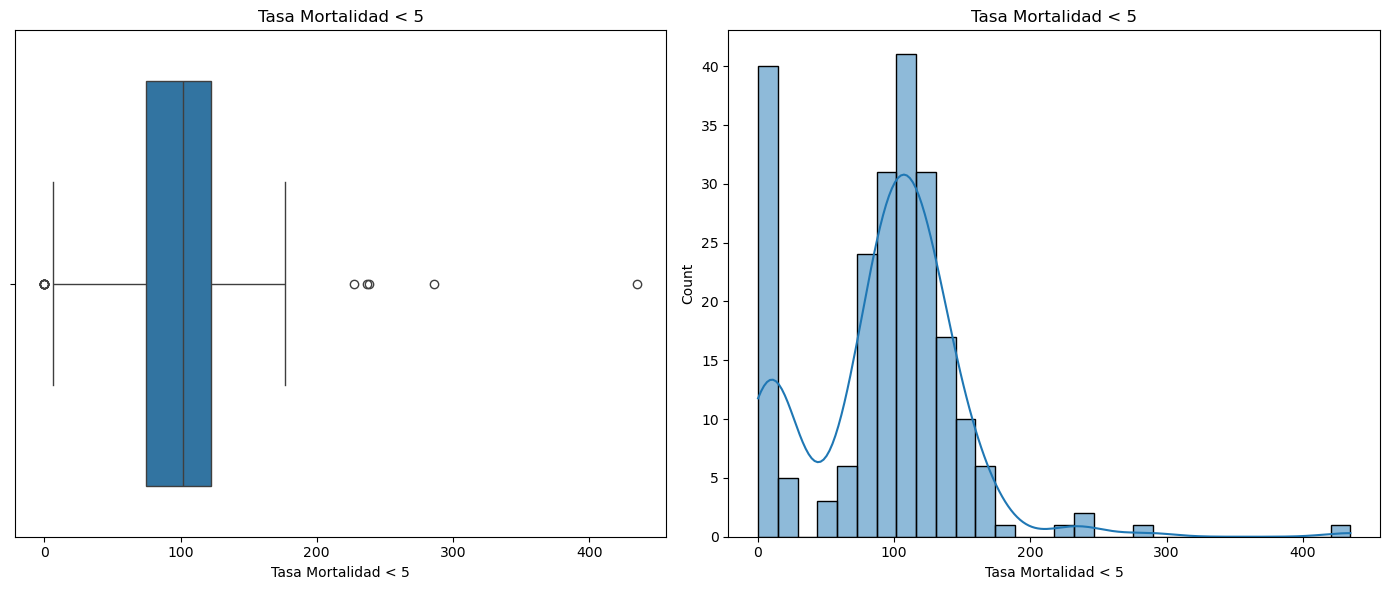

In [189]:
columna = 'Tasa Mortalidad < 5'
plt.figure(figsize=(14, 6))
# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=mi[columna])
plt.title('{}'.format(columna))

#Histograma
plt.subplot(1, 2, 2)
sns.histplot(mi[columna], bins=30, kde=True)
plt.title('{}'.format(columna))
plt.tight_layout()
plt.show()

In [190]:
mi["Tasa Mortalidad < 5"].max()

435.0

In [191]:
mi["Tasa Mortalidad < 5"].min()

0.0

## Total Nacidos + Muertos         

In [192]:
mi["Total Nacidos + Muertos"].describe()

count      220.000000
mean      4529.722727
std       4064.383090
min         19.000000
25%       1292.000000
50%       3121.500000
75%       6360.500000
max      15795.000000
Name: Total Nacidos + Muertos, dtype: float64

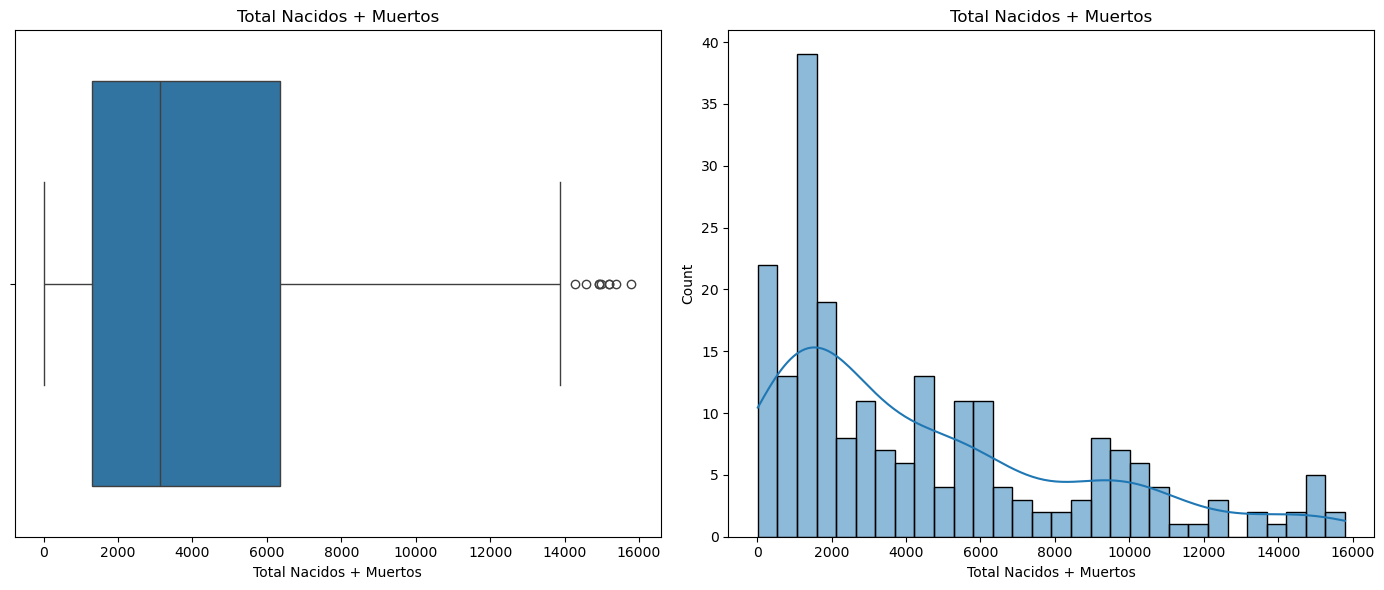

In [193]:
columna = 'Total Nacidos + Muertos'
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=mi[columna])
plt.title('{}'.format(columna))

#Histograma
plt.subplot(1, 2, 2)
sns.histplot(mi[columna], bins=30, kde=True)
plt.title('{}'.format(columna))
plt.tight_layout()
plt.show()

In [194]:
mi["Total Nacidos + Muertos"].max()

15795

In [195]:
mi["Total Nacidos + Muertos"].min()

19

In [196]:
variables = ["Año","Área"]

## Nacimientos

In [197]:
mi["Nacimientos"].describe()

count      220.000000
mean      4469.618182
std       4010.674695
min         19.000000
25%       1276.250000
50%       3075.000000
75%       6287.000000
max      15533.000000
Name: Nacimientos, dtype: float64

En general la variable tiene un comportamiento esperable, con lugares con muy bajos nacimientos (como podría ser Sumapaz) y otros con mayor cantidad (como Usme o Engativá)

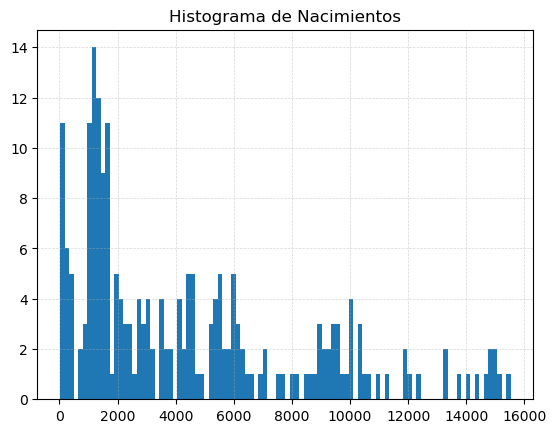

In [198]:
plt.hist(mi["Nacimientos"],bins=100)
plt.title("Histograma de Nacimientos")
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

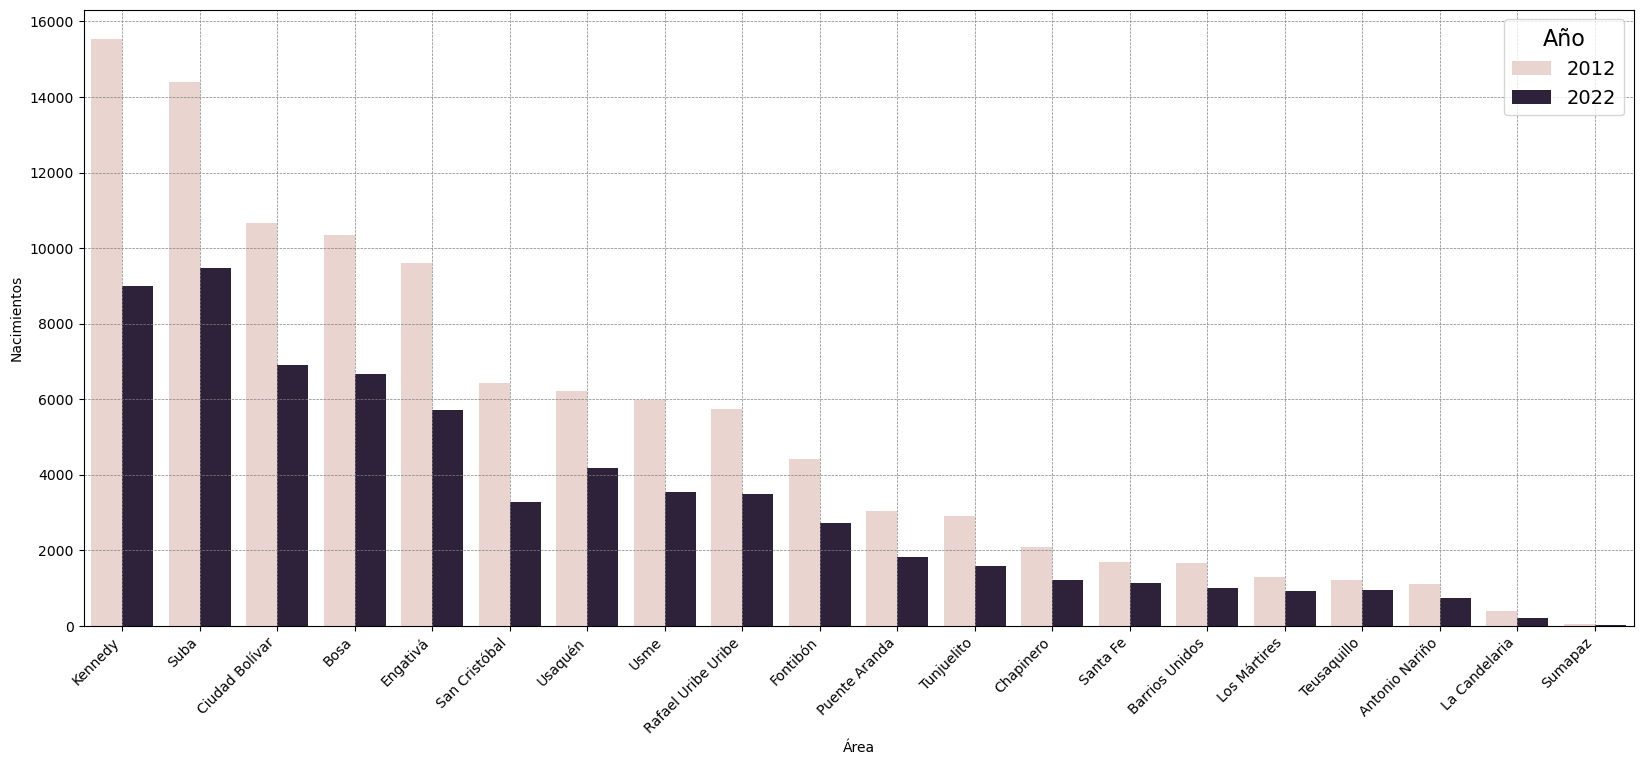

In [199]:
poblacion_ordenada = mi[(mi["Año"]==2022)|(mi["Año"]==2012)].sort_values(by="Nacimientos", ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x="Área",y="Nacimientos",data=poblacion_ordenada,hue="Año")
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Año", fontsize=14, title_fontsize=16)
plt.show()

Sin embargo, para realizar análisis comparativo, debe tenerse en cuenta el factor poblacional, por lo que esta variable debe ser normalizada con base en la población por localidad para cada año.

Esto es precisamente lo que se logra con la variable 'Tasa general de Fecundidad'

## Población

In [200]:
mi["Población"].describe()

count       220.000000
mean     107506.613636
std       95040.732318
min         764.000000
25%       35607.500000
50%       83584.000000
75%      164112.000000
max      360137.000000
Name: Población, dtype: float64

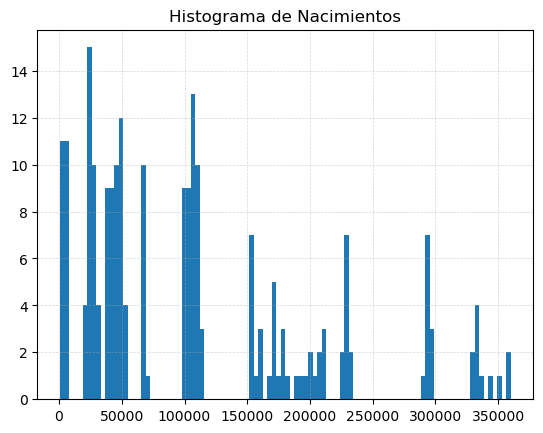

In [201]:
plt.hist(mi["Población"],bins=100)
plt.title("Histograma de Nacimientos")
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

El comportamiento es esperable, dado que se están combinando tendencias demográficas de localidades con situaciones y características muy diferentes entre sí. 

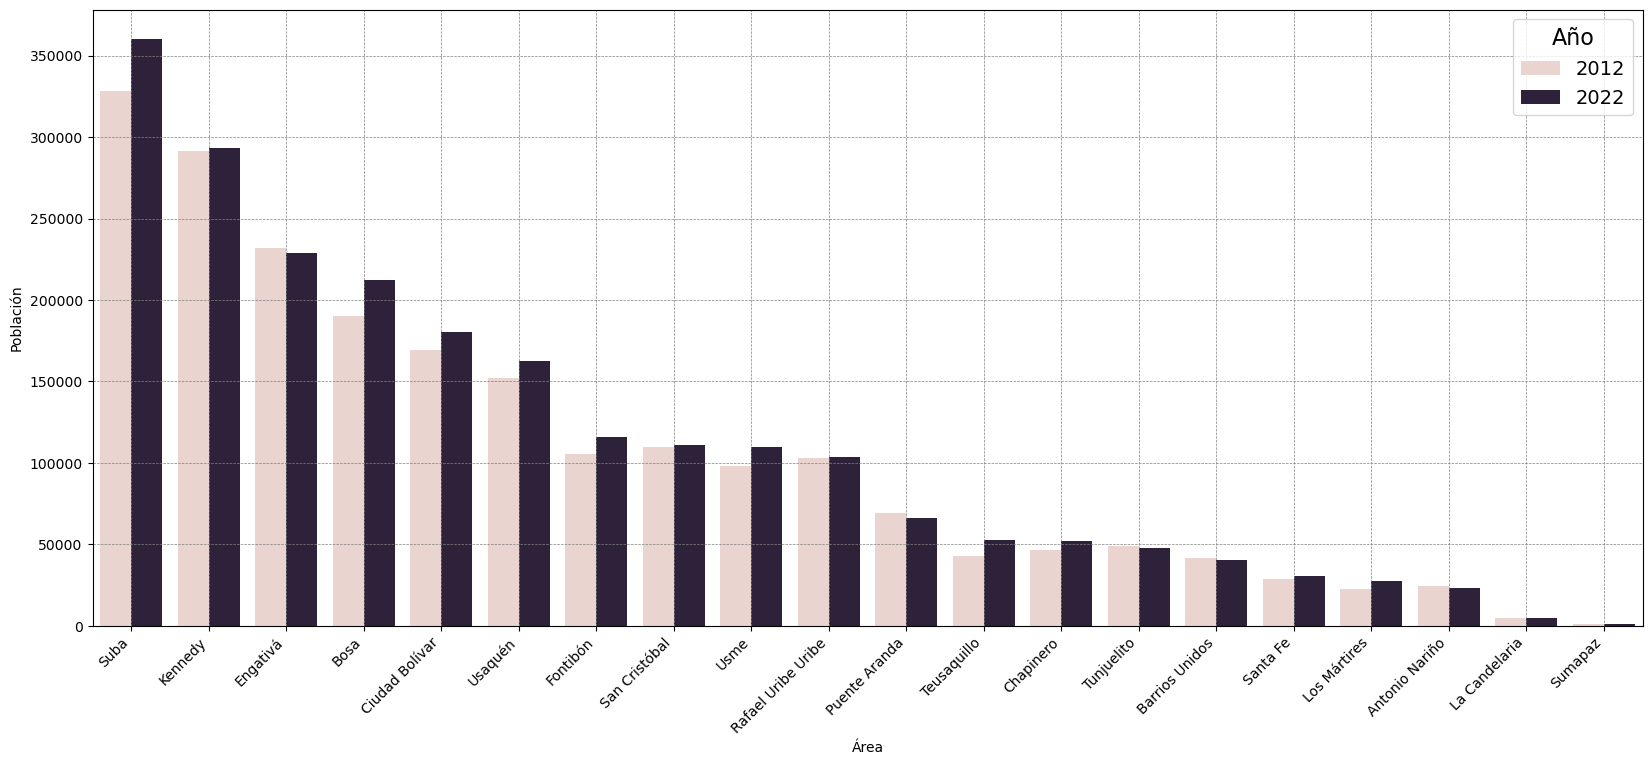

In [202]:
poblacion_ordenada = mi[(mi["Año"]==2022)|(mi["Año"]==2012)].sort_values(by="Población", ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x="Área",y="Población",data=poblacion_ordenada,hue="Año")
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Año", fontsize=14, title_fontsize=16)
plt.show()

Las localidades con más población son Suba, Kennedy y Engativá; mientras que las que menos poseen son Antonio Nariño, La Candelaria y Sumapaz.

Además se observa que desde 2012 a 2022 no han habido cambios demográficos importantes; no obstante, en algunas localidades ha crecido más la población que en otras

Para obtener información más significativa respecto a la población, se crea una nueva variable que sea 'Tasa de Crecimiento Poblacional', que podría aportar más detalles al análisis

In [203]:
actuales = list(mi.sort_values(by=["Año","Área"])["Población"].values)
pasados = [24679, 43127, 185297, 45992, 167959, 232460, 104304, 289771, 
           5086, 22708, 69963, 102987, 109528, 28151, 324375, 885, 
           42628, 49399, 150634, 96258] + actuales[:-20]

mi = mi.sort_values(by=["Año","Área"])
mi["Tasa crecimiento poblacional"] = (np.array(actuales) - np.array(pasados)) / np.array(pasados) * 100

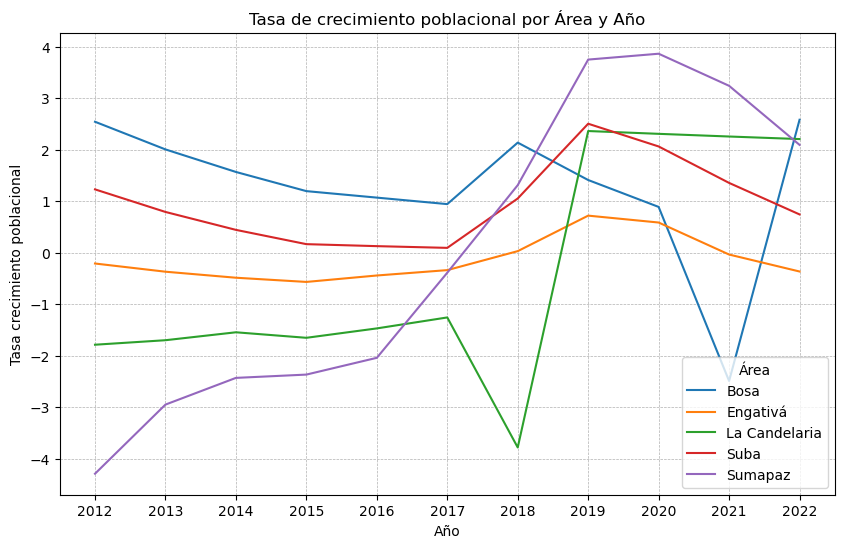

In [204]:
mi_localidades_año = mi[mi["Área"].isin(["Suba","Kenndy","Engativá","Bosa","La Candelaria","Sumapaz"])]
plt.figure(figsize=(10, 6))
sns.lineplot(x="Año",y="Tasa crecimiento poblacional",hue="Área",data=mi_localidades_año)
plt.title("Tasa de crecimiento poblacional por Área y Año")
plt.xticks([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [205]:
variables.append("Tasa crecimiento poblacional")

## Tasa general de fecundidad y Tasa global de fecundidad

**Tasa General de Fecundidad:** Número de nacimientos vivos por cada 1000 mujeres en edad fértil

Por tanto, esta columna debe ser el resultado de realizar la operación respectiva con las dos variables anteriores

In [206]:
(np.round(mi["Nacimientos"]/mi["Población"]*1000,1) == mi["Tasa general de fecundidad"]).all()

True

**Tasa Global de Fecundidad:** Número total de hijos que una mujer hubiera tenido si se le aplicaran las tasas de fecundidad por edad específica durante su vida reproductiva

*Supongamos que observas que en un año, las mujeres de 20-24 años tienen en promedio 0.2 hijos, las de 25-29 años tienen 0.3 hijos, y así sucesivamente para cada grupo de edad. Si sumas estas tasas para todas las edades fértiles, podrías obtener una tasa global de fecundidad de, por ejemplo, 2.1 hijos por mujer.*

**No son comparables en si**

In [207]:
mi[["Tasa general de fecundidad","Tasa global de fecundidad"]].describe()

Tasa general de fecundidad  Tasa global de fecundidad
count                  220.000000                 220.000000
mean                    43.029545                   1.393273
std                     11.400312                   0.363401
min                     15.500000                   0.500000
25%                     34.675000                   1.100000
50%                     42.150000                   1.400000
75%                     51.900000                   1.700000
max                     85.200000                   2.800000

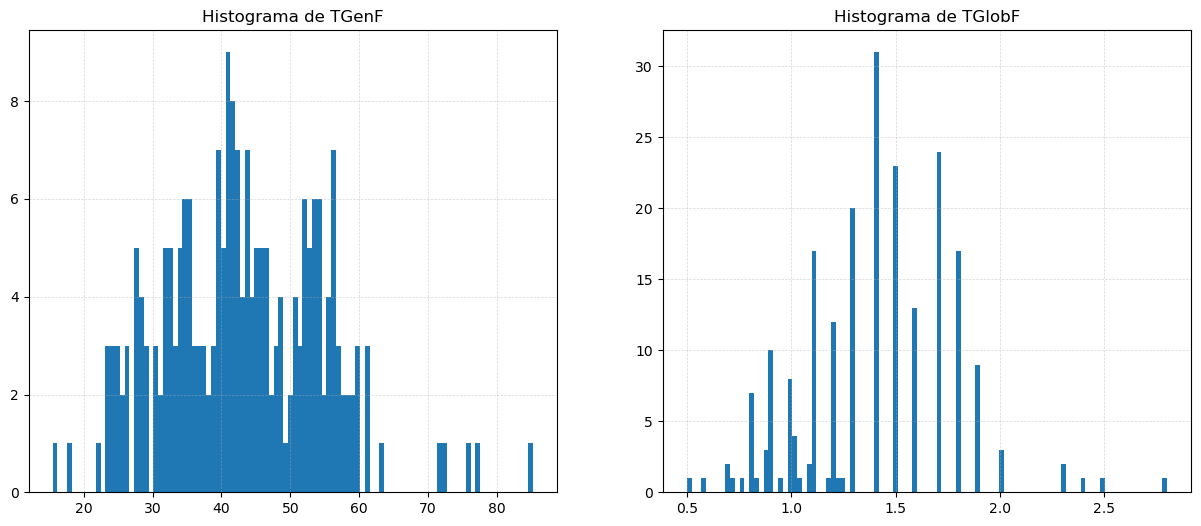

In [208]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].hist(mi["Tasa general de fecundidad"],bins=100)
ax[1].hist(mi["Tasa global de fecundidad"],bins=100)
ax[0].set_title("Histograma de TGenF")
ax[1].set_title("Histograma de TGlobF")
ax[0].grid(linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

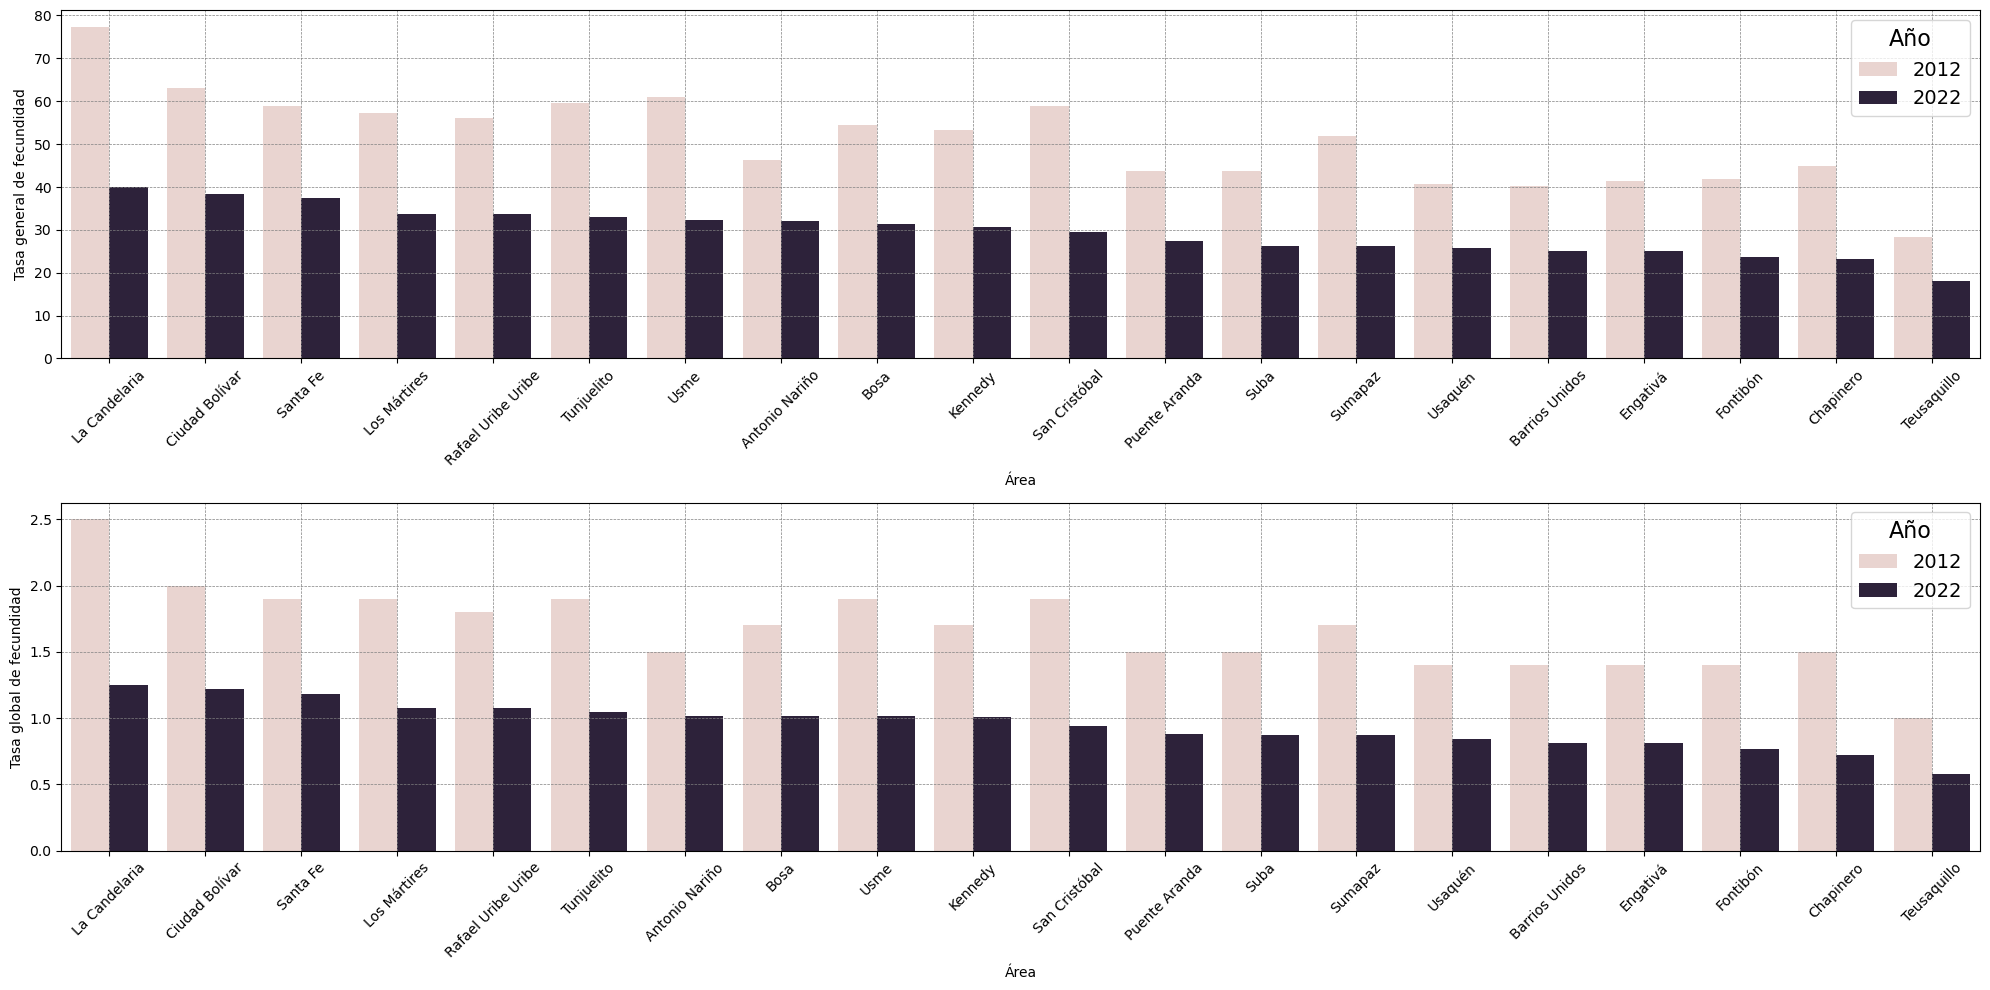

In [209]:
poblacion_ordenada_tg = mi[(mi["Año"]==2022)|(mi["Año"]==2012)].sort_values(by=["Año","Tasa general de fecundidad"], ascending=False)
poblacion_ordenada_tgl = mi[(mi["Año"]==2022)|(mi["Año"]==2012)].sort_values(by=["Año","Tasa global de fecundidad"], ascending=False)

fig,ax = plt.subplots(2,1,figsize=(20, 10))
sns.barplot(x="Área",y="Tasa general de fecundidad",data=poblacion_ordenada_tg,hue="Año",ax=ax[0])
sns.barplot(x="Área",y="Tasa global de fecundidad",data=poblacion_ordenada_tgl,hue="Año",ax=ax[1])
ax[0].grid(linestyle="--", linewidth=0.5, color="gray")
ax[1].grid(linestyle="--", linewidth=0.5, color="gray")
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[0].legend(title="Año", fontsize=14, title_fontsize=16)
ax[1].legend(title="Año", fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

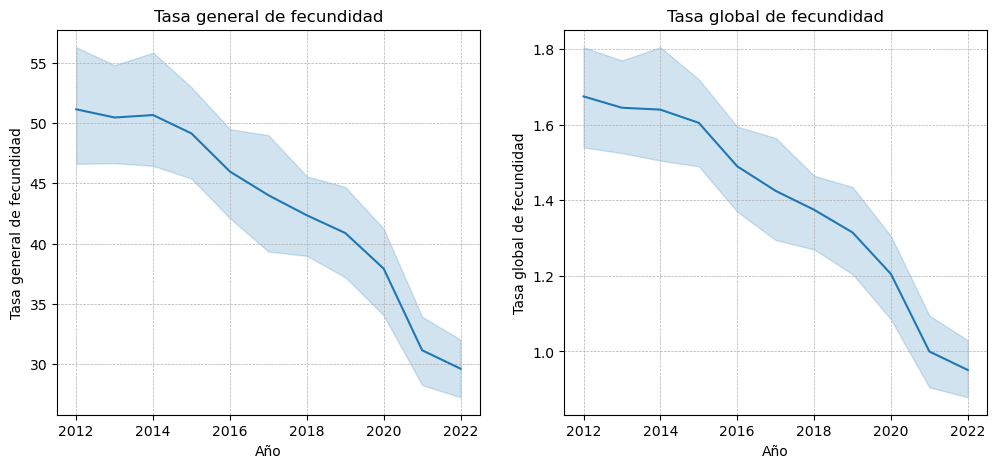

In [210]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(x="Año",y="Tasa general de fecundidad",data=mi,ax=ax[0])
sns.lineplot(x="Año",y="Tasa global de fecundidad",data=mi,ax=ax[1])
ax[0].set_title('Tasa general de fecundidad')
ax[1].set_title('Tasa global de fecundidad')
ax[0].grid(linestyle='--', linewidth=0.5)
ax[1].grid(linestyle='--', linewidth=0.5)
plt.show()

In [211]:
variables.append("Tasa global de fecundidad")
variables.append("Tasa general de fecundidad")

## Nacidos Vivos y Muertos <1 Año

In [212]:
mi[["Muertes < 1","Nacidos Vivos <1"]].describe()

Muertes < 1  Nacidos Vivos <1
count   220.000000        220.000000
mean     49.690909       4486.504545
std      45.707277       4025.650360
min       0.000000         19.000000
25%      14.000000       1280.750000
50%      32.000000       3081.500000
75%      73.250000       6313.500000
max     202.000000      15621.000000

In [213]:
np.abs(mi["Nacimientos"]-mi["Nacidos Vivos <1"]).mean()

16.886363636363637

In [214]:
mi[mi["Nacidos Vivos <1"] > mi["Nacimientos"]][["Área","Nacimientos","Muertes < 1","Nacidos Vivos <1"]]

Área  Nacimientos  Muertes < 1  Nacidos Vivos <1
0    Antonio Nariño         1114           16              1120
11   Barrios Unidos         1671           17              1679
22             Bosa        10341          141             10393
33        Chapinero         2080           22              2082
44   Ciudad Bolívar        10669          166             10757
..              ...          ...          ...               ...
164            Suba         9481           94              9495
186     Teusaquillo          952            9               953
197      Tunjuelito         1571           19              1575
208         Usaquén         4184           49              4194
219            Usme         3538           55              3557

[209 rows x 4 columns]

En todos los casos el 'Numero de Nacidos Vivos < 1' es mayor que el número de Nacimientos, lo que indica que esta variable cuenta ciertos valores que lo hace la otra variable

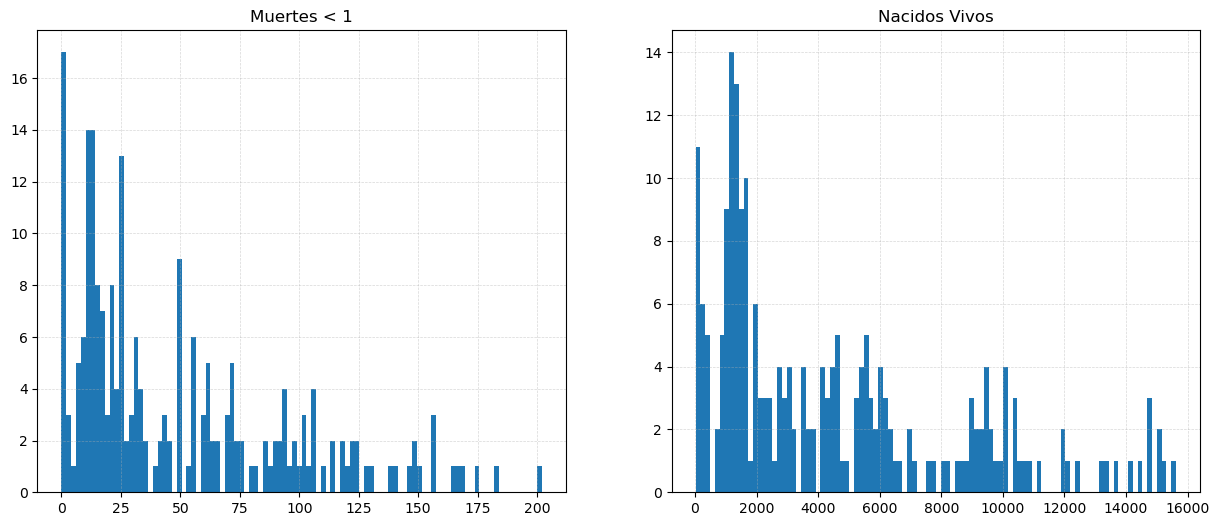

In [215]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].hist(mi["Muertes < 1"],bins=100)
ax[1].hist(mi["Nacidos Vivos <1"],bins=100)
ax[0].set_title("Muertes < 1")
ax[1].set_title("Nacidos Vivos")
ax[0].grid(linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

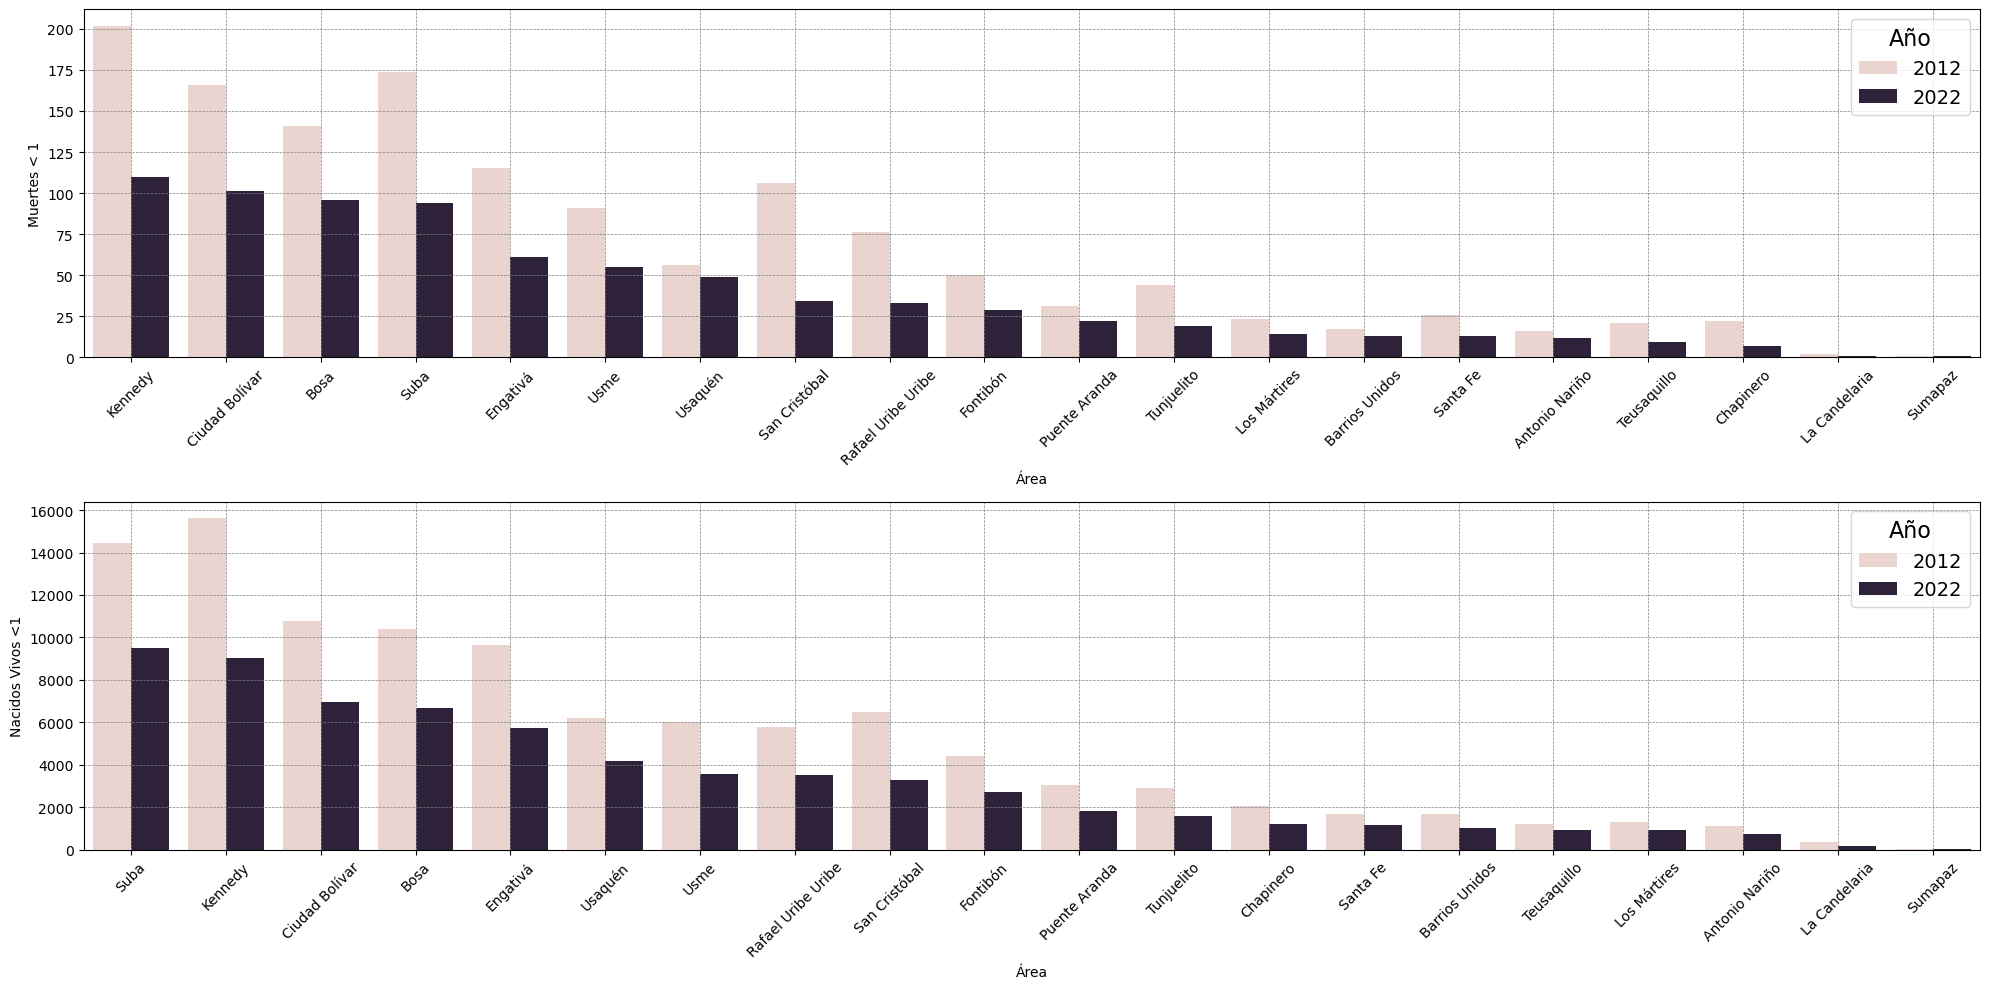

In [216]:
poblacion_ordenada_tg = mi[(mi["Año"]==2022)|(mi["Año"]==2012)].sort_values(by=["Año","Muertes < 1"], ascending=False)
poblacion_ordenada_tgl = mi[(mi["Año"]==2022)|(mi["Año"]==2012)].sort_values(by=["Año","Nacidos Vivos <1"], ascending=False)

fig,ax = plt.subplots(2,1,figsize=(20, 10))
sns.barplot(x="Área",y="Muertes < 1",data=poblacion_ordenada_tg,hue="Año",ax=ax[0])
sns.barplot(x="Área",y="Nacidos Vivos <1",data=poblacion_ordenada_tgl,hue="Año",ax=ax[1])
ax[0].grid(linestyle="--", linewidth=0.5, color="gray")
ax[1].grid(linestyle="--", linewidth=0.5, color="gray")
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[0].legend(title="Año", fontsize=14, title_fontsize=16)
ax[1].legend(title="Año", fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

Para una comparación más acertada se debe analizar una tasa o índice normalizado según la población de la localidad

## Tasa por mil <1

**Tasa de mortalidad infantil:** Frecuencia de las defunciones ocurridas en niños menores de 1 año por cada 1.000 nacidos vivos

In [217]:
mi[~(np.round(mi["Muertes < 1"]/mi["Nacidos Vivos <1"]*1000,1) == mi["Tasa por mil <1"])]

Año                Área  Nacimientos  Población  \
7    2019      Antonio Nariño          950      22106   
18   2019      Barrios Unidos         1269      38599   
29   2019                Bosa         8929     210469   
40   2019           Chapinero         1609      49009   
51   2019      Ciudad Bolívar         8981     178171   
62   2019            Engativá         7682     228560   
73   2019            Fontibón         3539     109878   
84   2019             Kennedy        11861     297611   
106  2019        Los Mártires         1303      24825   
117  2019       Puente Aranda         2404      66085   
128  2019  Rafael Uribe Uribe         4569     101562   
139  2019       San Cristóbal         4320     109493   
150  2019            Santa Fe         1678      30024   
161  2019                Suba        11948     345601   
183  2019         Teusaquillo         1277      44654   
194  2019          Tunjuelito         2189      48236   
205  2019             Usaquén         5219     157680   
216  2019                Usme         4689     105907   

     Tasa general de fecundidad  Tasa global de fecundidad  Muertes < 1  \
7                          43.0                        1.4           11   
18                         32.9                        1.1           17   
29                         42.4                        1.4          103   
40                         32.8                        1.0           26   
51                         50.4                        1.6          107   
62                         33.6                        1.1           93   
73                         32.2                        1.1           34   
84                         39.9                        1.3          122   
106                        52.5                        1.6           14   
117                        36.4                        1.2           26   
128                        45.0                        1.4           56   
139                        39.5                        1.3           61   
150                        55.9                        1.8           23   
161                        34.6                        1.1          130   
183                        28.6                        0.9           13   
194                        45.4                        1.4           32   
205                        33.1                        1.1           32   
216                        44.3                        1.4           55   

     Nacidos Vivos <1  Tasa por mil <1  Nacidos Con Bajo Peso  ...  \
7                 951             12.0                    137  ...   
18               1270             13.0                    177  ...   
29               8953             12.0                   1291  ...   
40               1613             16.0                    222  ...   
51               9016             12.0                   1344  ...   
62               7699             12.0                   1018  ...   
73               3546             10.0                    447  ...   
84              11883             10.0                   1607  ...   
106              1308             11.0                    173  ...   
117              2410             11.0                    302  ...   
128              4578             12.0                    636  ...   
139              4341             14.0                    704  ...   
150              1685             14.0                    252  ...   
161             11974             11.0                   1605  ...   
183              1283             10.0                    167  ...   
194              2196             15.0                    345  ...   
205              5228              6.0                    699  ...   
216              4706             12.0                    681  ...   

     Partos Ignorados  Madres R. Contributivo  Madres R. Especial  \
7                   0                     582                   0   
18                  0      

Se observa que hay algunos registros redondeados, para ser más exactos, se recalcula

In [218]:
mi["Tasa por mil <1"] = np.round(mi["Muertes < 1"]/mi["Nacidos Vivos <1"]*1000,1)

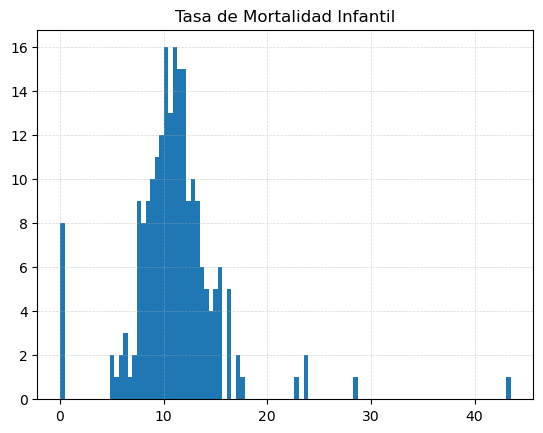

In [219]:
plt.hist(mi["Tasa por mil <1"],bins=100)
plt.title("Tasa de Mortalidad Infantil")
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

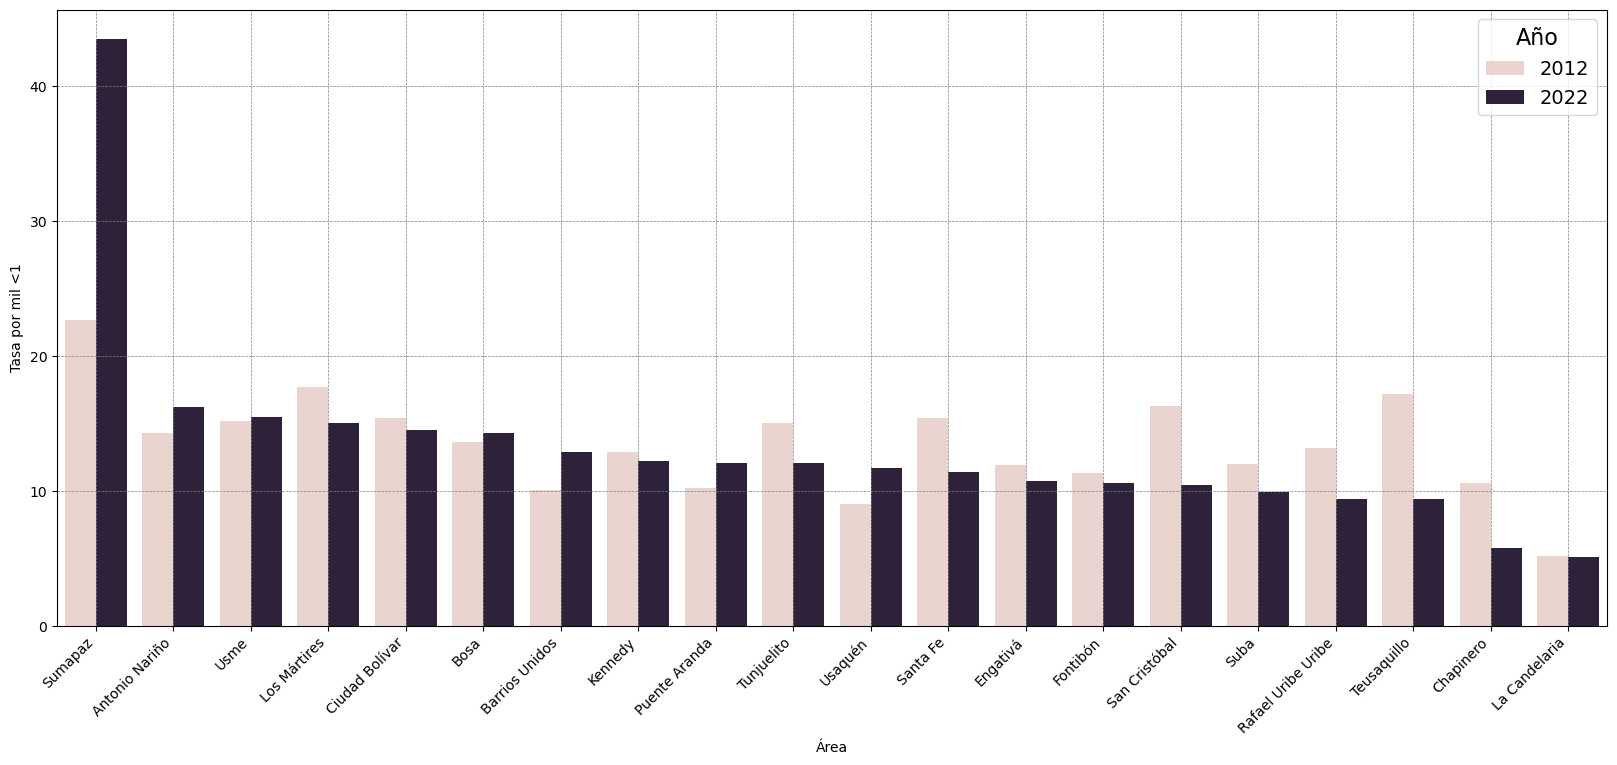

In [220]:
poblacion_ordenada = mi[(mi["Año"]==2022)|(mi["Año"]==2012)].sort_values(by=["Año","Tasa por mil <1"], ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x="Área",y="Tasa por mil <1",data=poblacion_ordenada,hue="Año")
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Año", fontsize=14, title_fontsize=16)
plt.show()

In [221]:
mi[mi["Área"]=="Sumapaz"][["Año","Tasa por mil <1","Nacidos Vivos <1","Muertes < 1"]]

Año  Tasa por mil <1  Nacidos Vivos <1  Muertes < 1
165  2012             22.7                44            1
166  2013              0.0                41            0
167  2014             28.6                35            1
168  2015              0.0                37            0
169  2016              0.0                22            0
170  2017              0.0                19            0
171  2018              0.0                34            0
172  2019              0.0                27            0
173  2020             23.8                42            1
174  2021              0.0                35            0
175  2022             43.5                23            1

El número es sesgado por la cantidad tan baja de nacimientos en Sumapaz

In [222]:
variables.append("Tasa por mil <1")
variables.append("Muertes < 1")

## Nacidos de bajo peso

In [223]:
mi["Nacidos Con Bajo Peso"].describe()

count     220.000000
mean      592.881818
std       521.119750
min         1.000000
25%       172.750000
50%       376.500000
75%       817.000000
max      2032.000000
Name: Nacidos Con Bajo Peso, dtype: float64

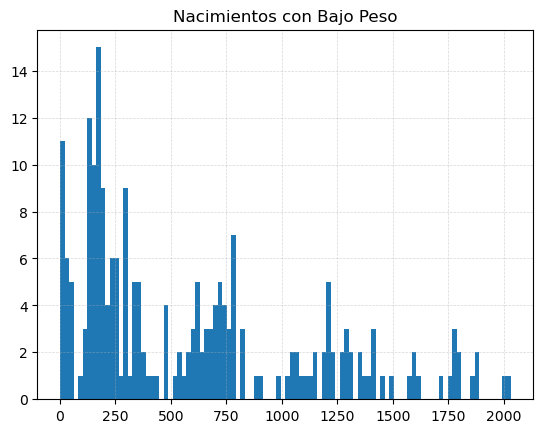

In [224]:
plt.hist(mi["Nacidos Con Bajo Peso"],bins=100)
plt.title("Nacimientos con Bajo Peso")
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

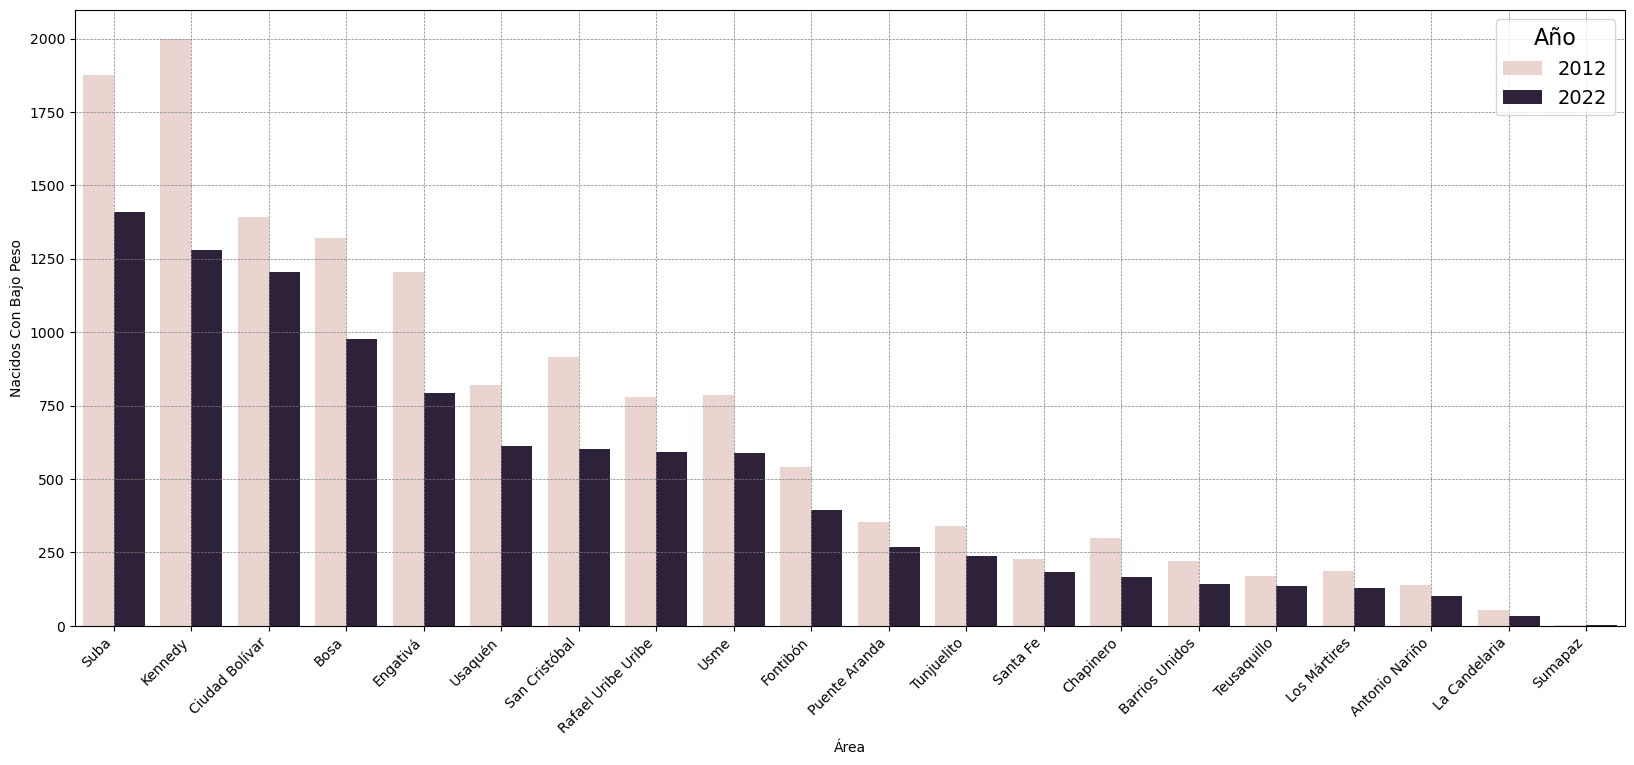

In [225]:
poblacion_ordenada = mi[(mi["Año"]==2022)|(mi["Año"]==2012)].sort_values(by=["Año","Nacidos Con Bajo Peso"], ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x="Área",y="Nacidos Con Bajo Peso",data=poblacion_ordenada,hue="Año")
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Año", fontsize=14, title_fontsize=16)
plt.show()

La variable se debe normalizar dado que está siendo afectada por la cantidad de habitantes por localidad

## Partos Instrumentados, Ignorados y Regimenes de Salud de la Madre

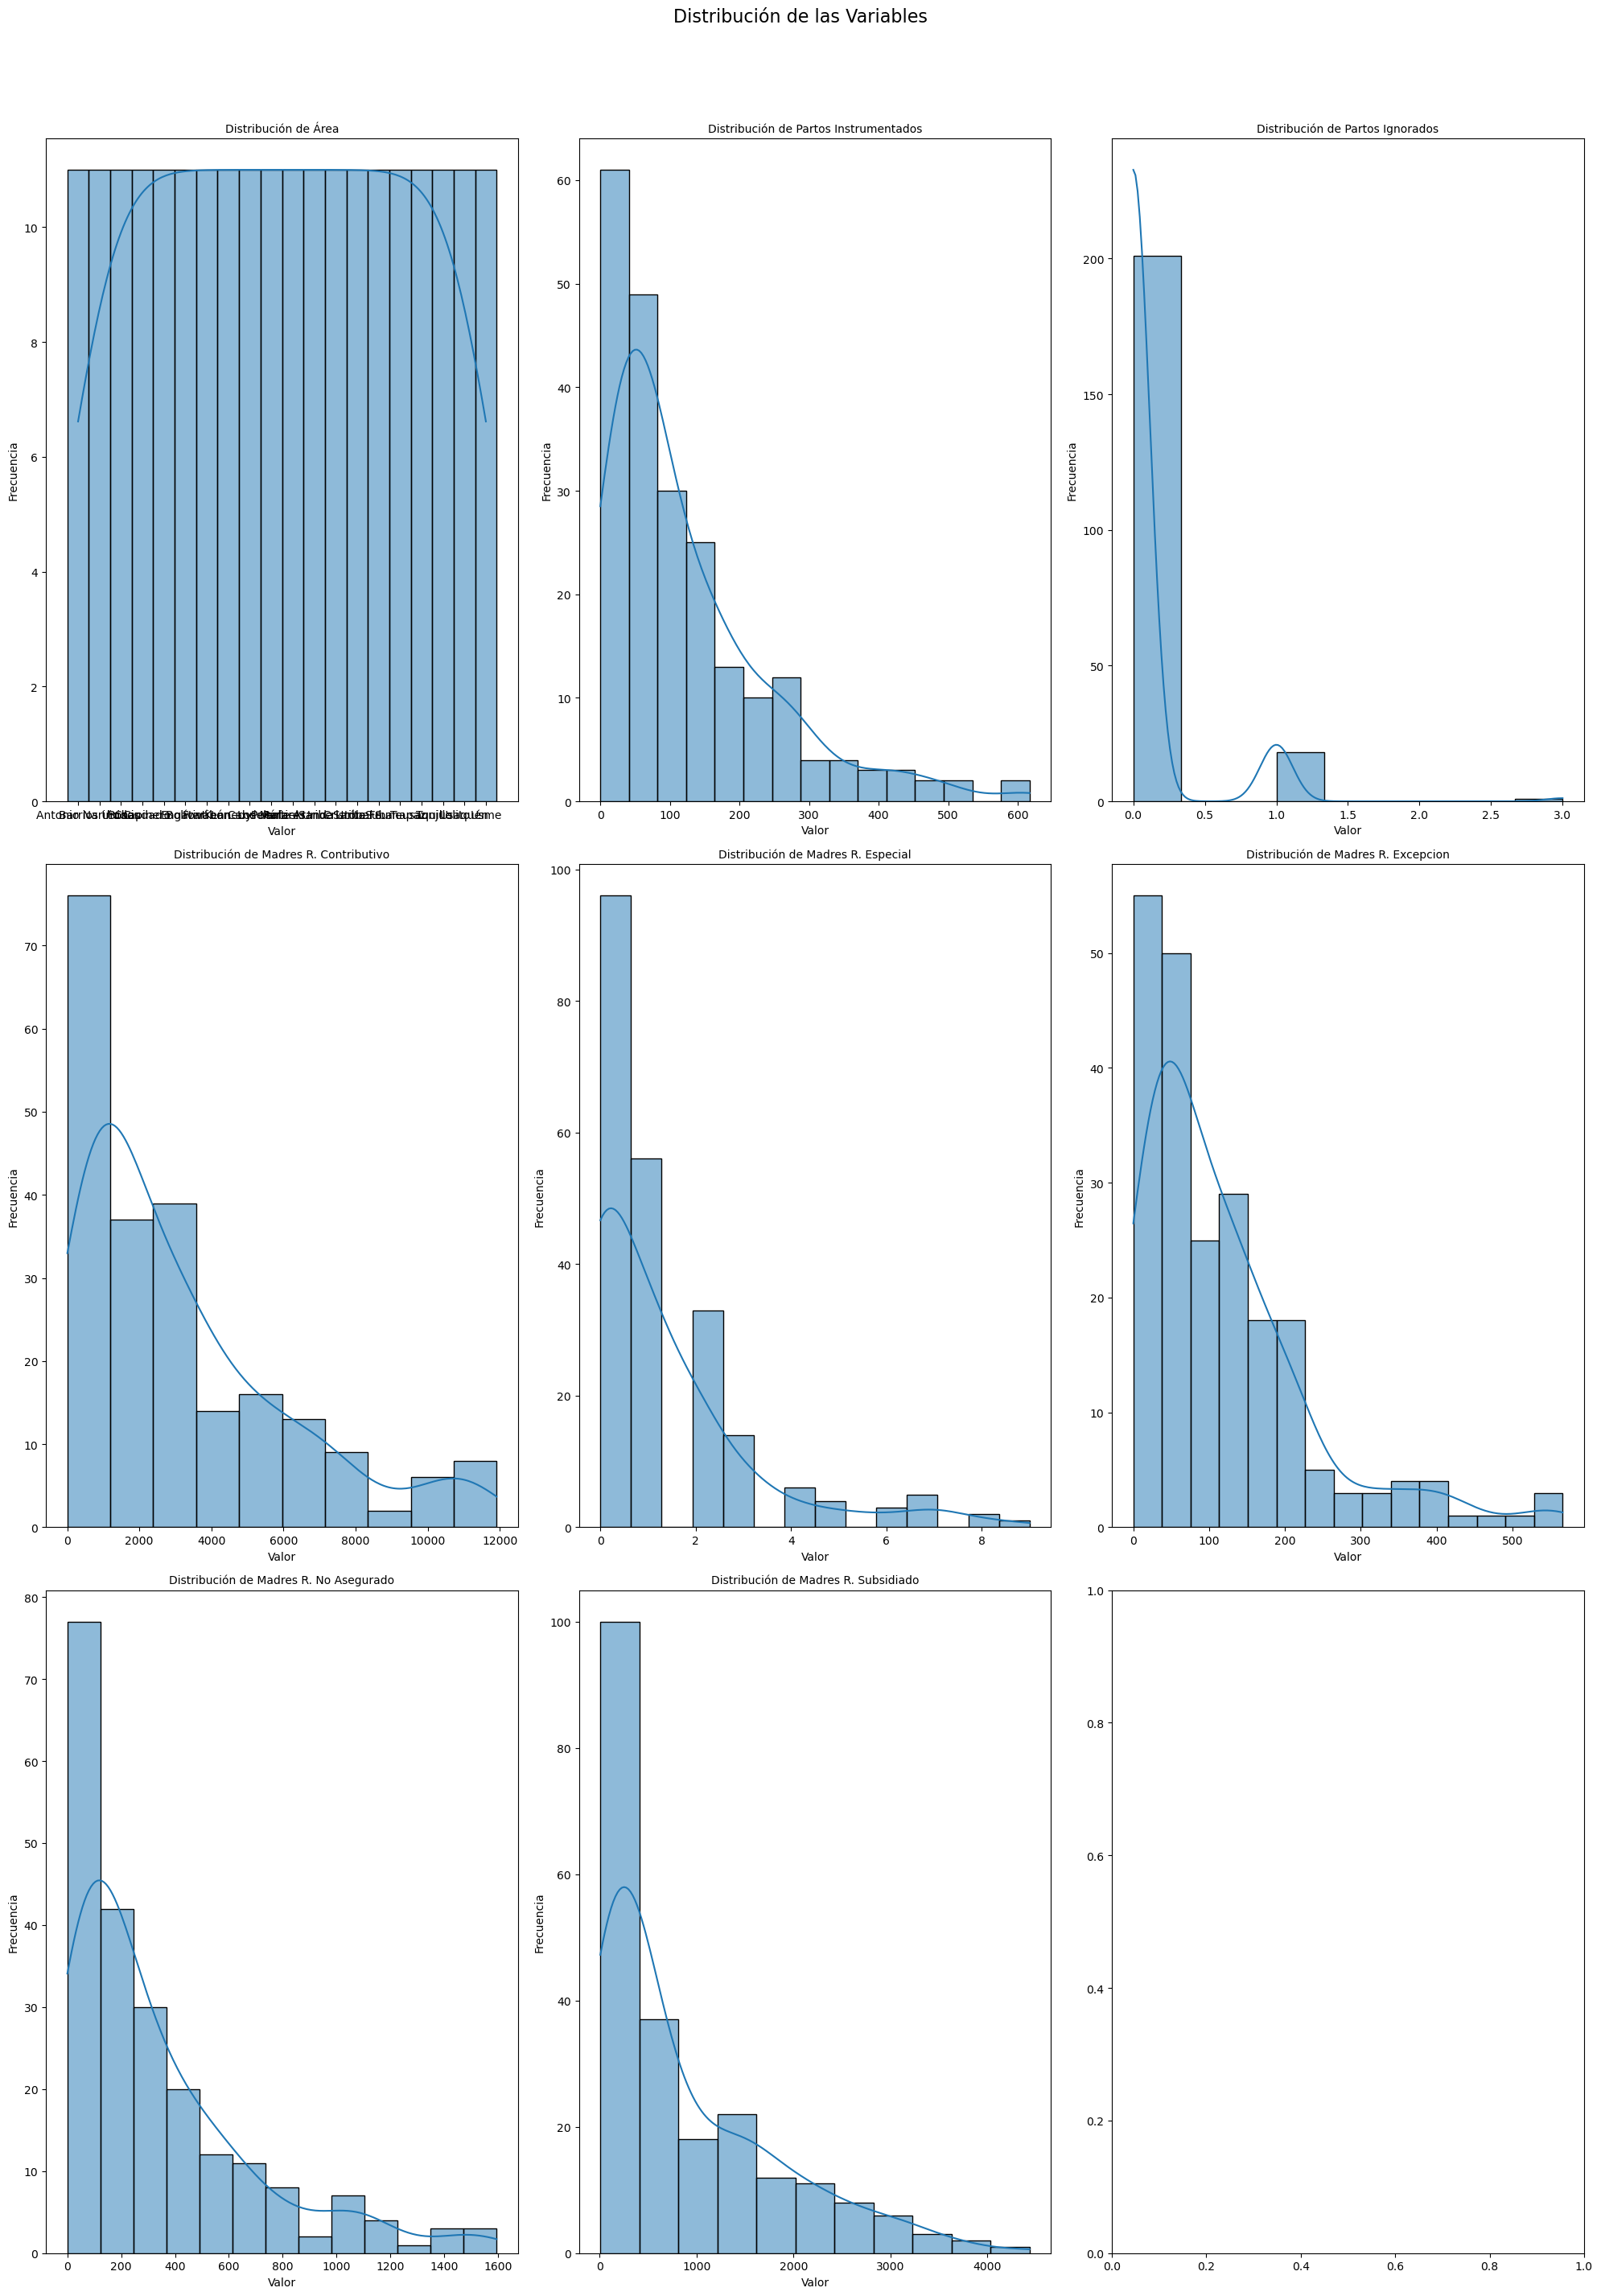

In [226]:
# Crear subgráficos
columnas_interes = ['Año', 'Área'] + list(mi.loc[:, 'Partos Instrumentados':'Madres R. Subsidiado'].columns)
dff = mi.loc[:, columnas_interes]
dff

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 30))
fig.suptitle('Distribución de las Variables', fontsize=16)

# Aplanar los ejes para un fácil acceso
axes = axes.flatten()

# Graficar cada variable
for i, column in enumerate(dff.columns.drop("Año")):
    sns.histplot(data=dff, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}', fontsize=10)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [227]:
columnas  = dff.columns.drop("Área")
cv = dff[columnas].std() / dff[columnas].mean()
print("\nCoeficiente de variación por columna:")
print(cv)


Coeficiente de variación por columna:
Año                       0.001571
Partos Instrumentados     0.977812
Partos Ignorados          3.539255
Madres R. Contributivo    0.930591
Madres R. Especial        1.375453
Madres R. Excepcion       0.961822
Madres R. No Asegurado    1.046785
Madres R. Subsidiado      1.059756
dtype: float64


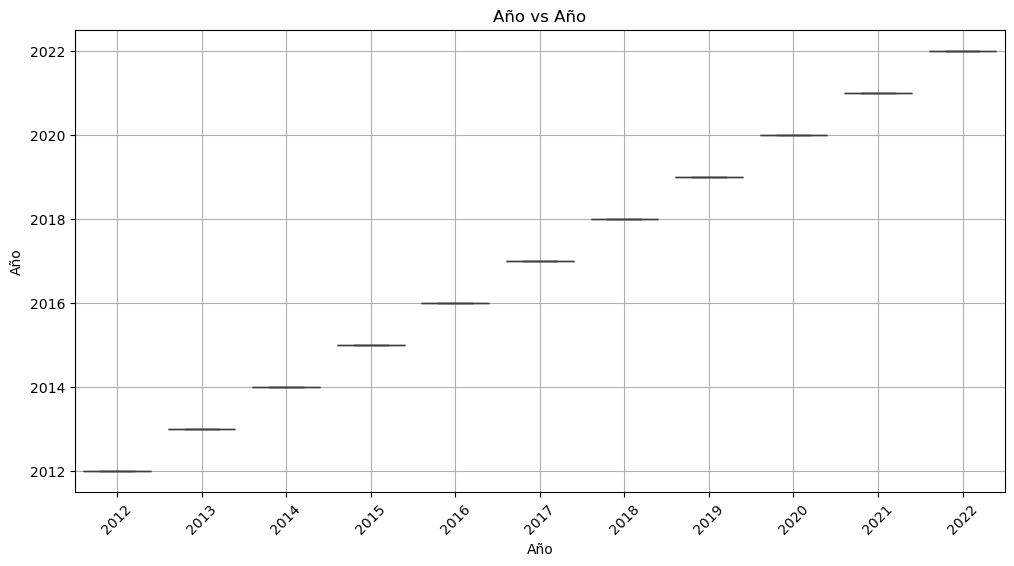

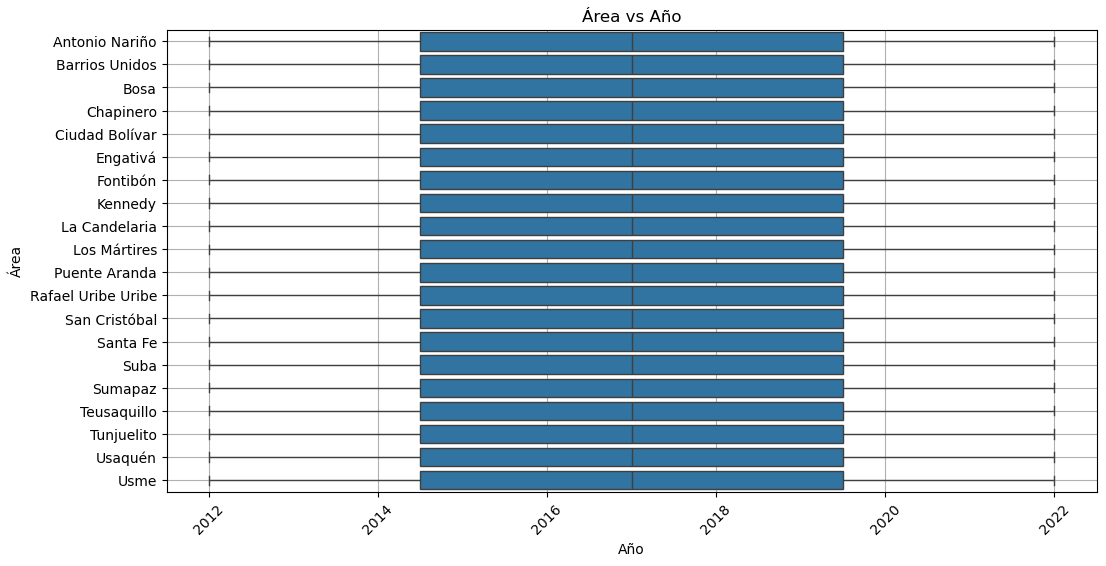

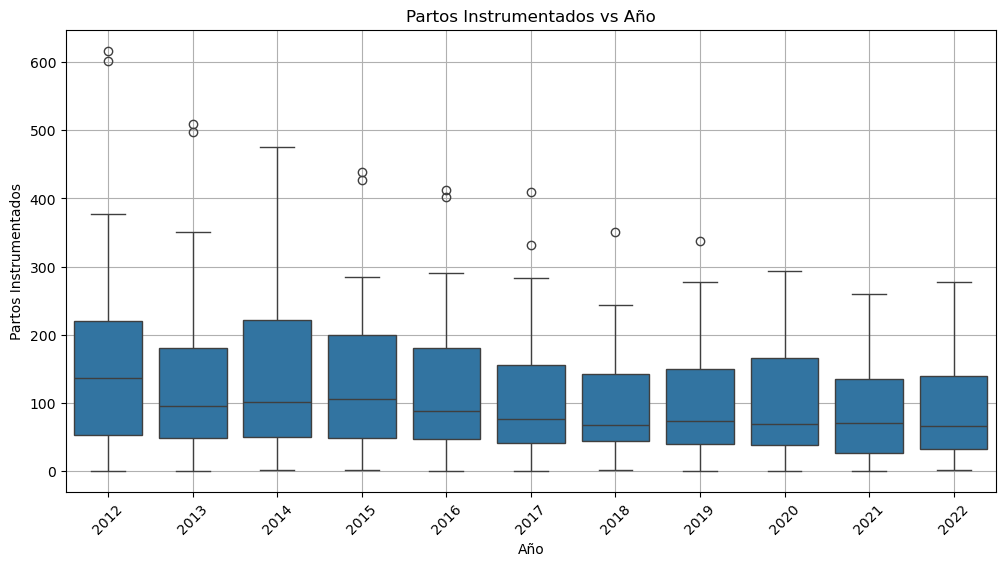

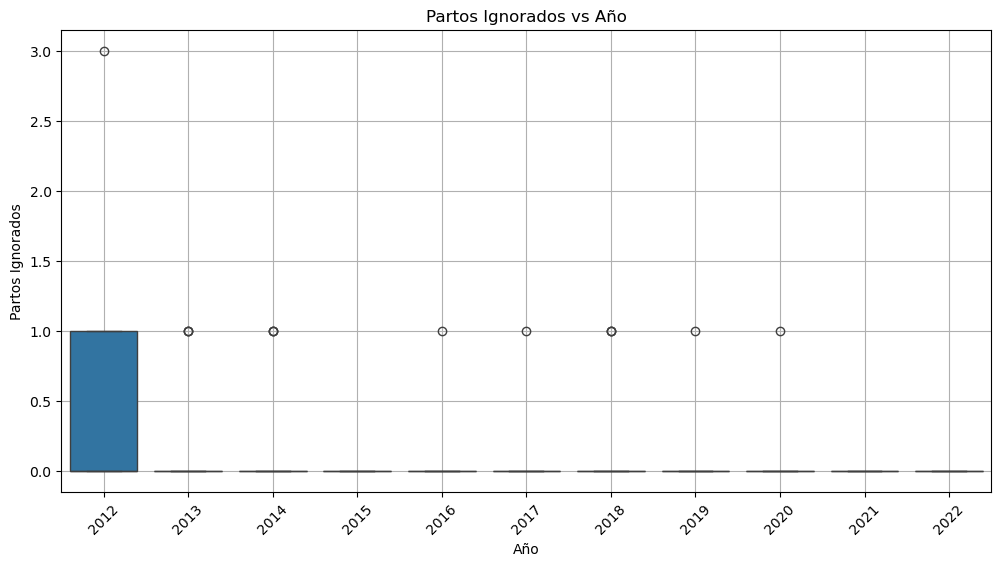

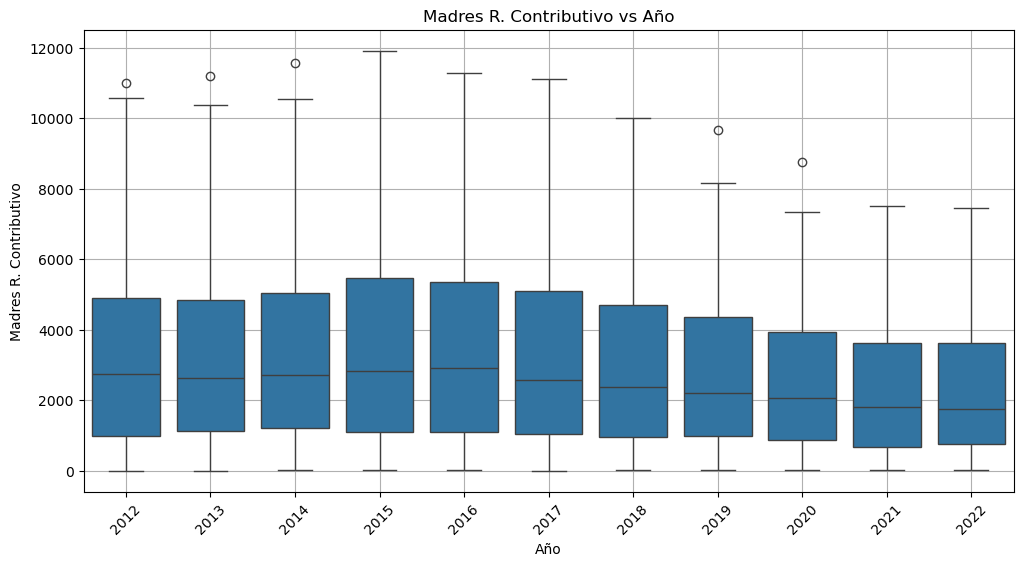

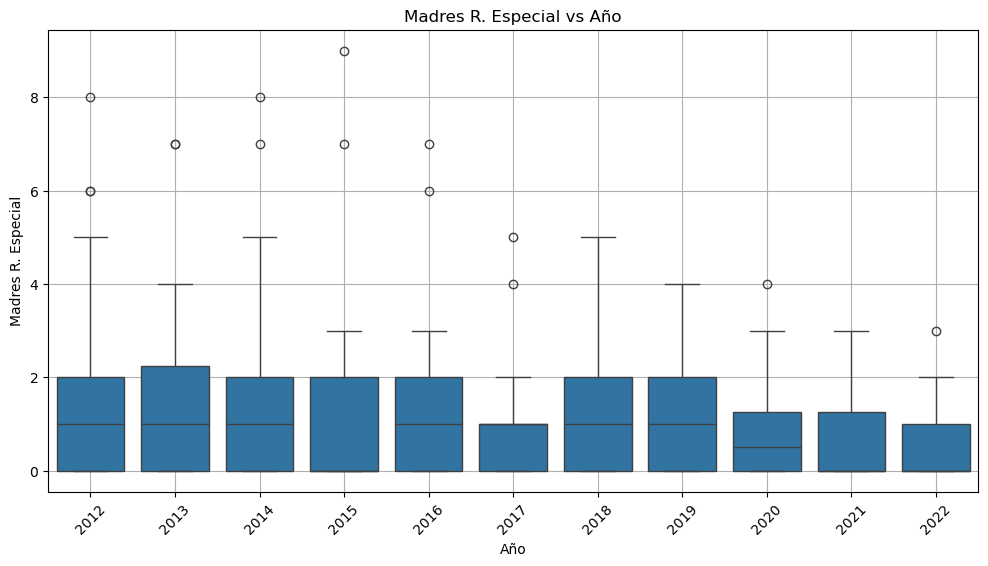

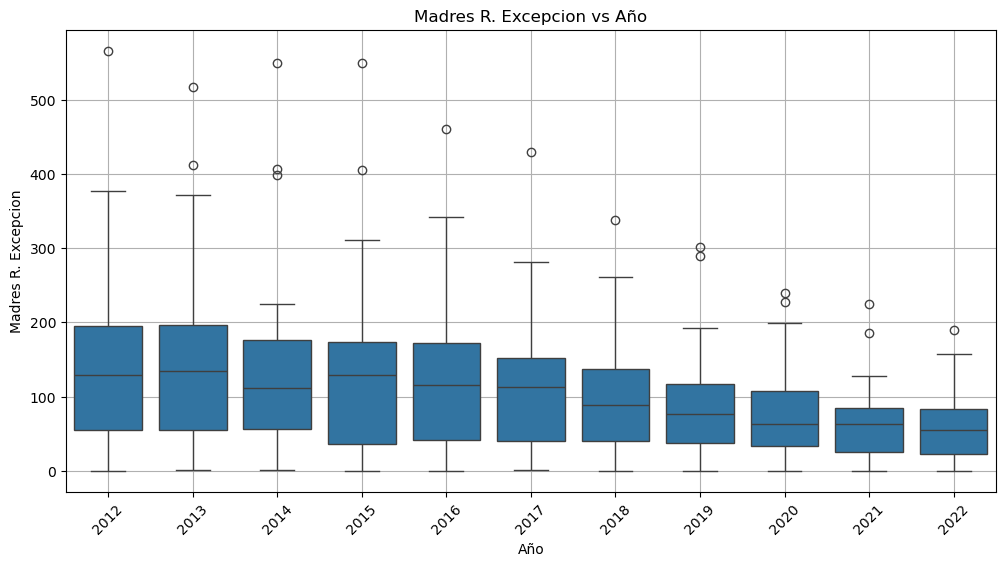

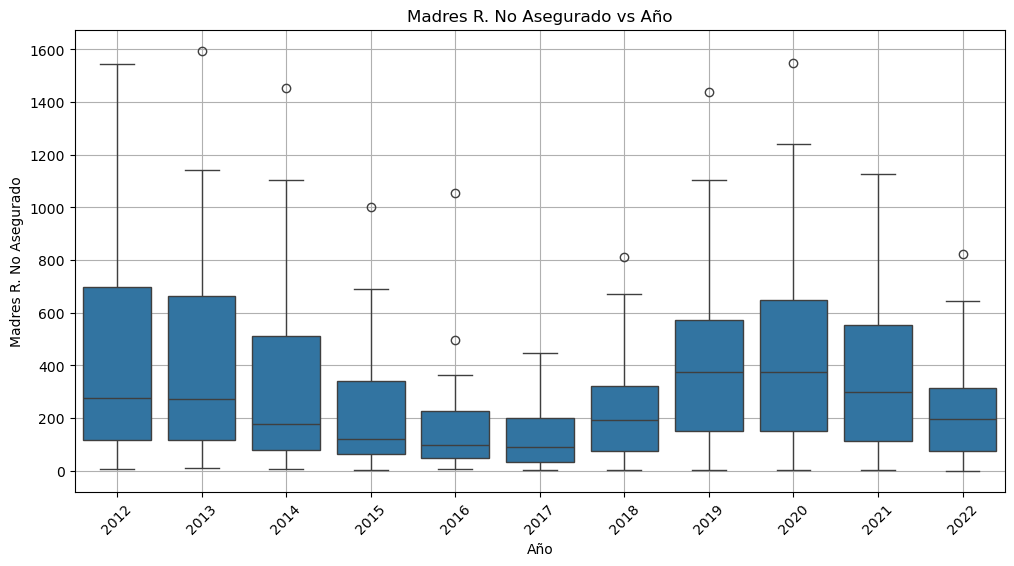

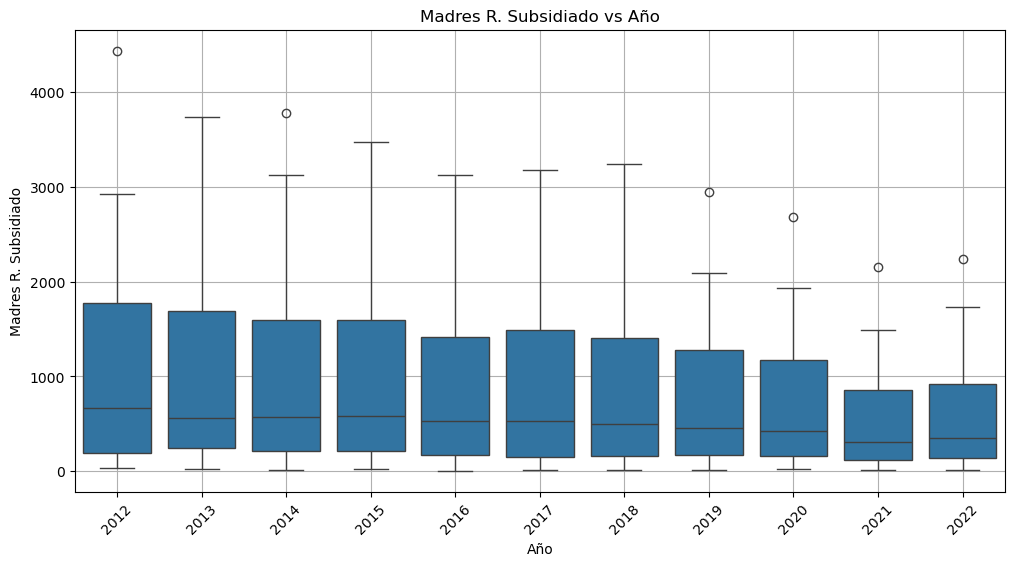

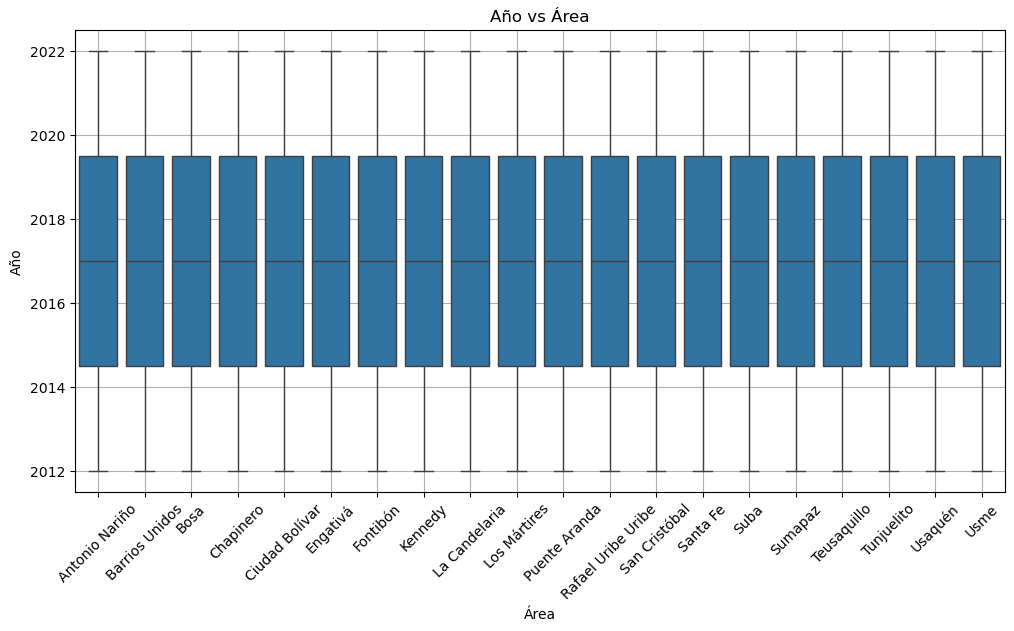

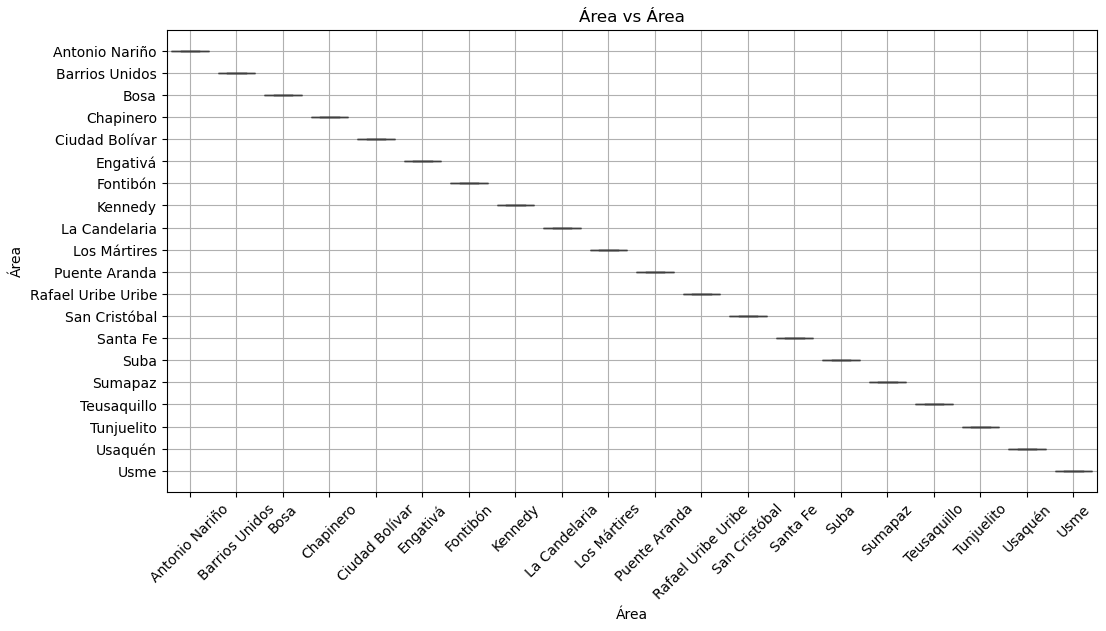

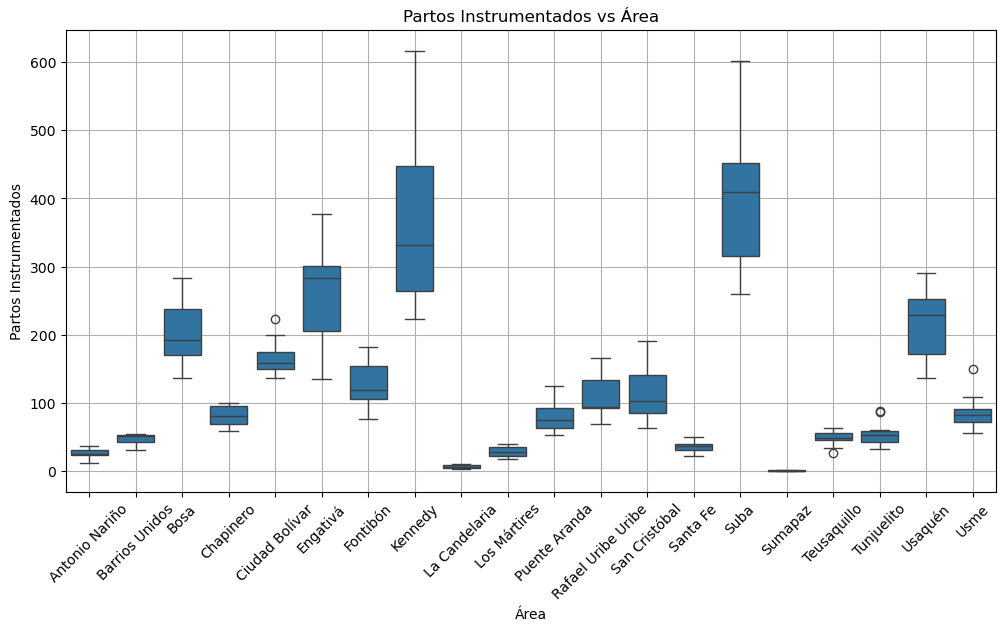

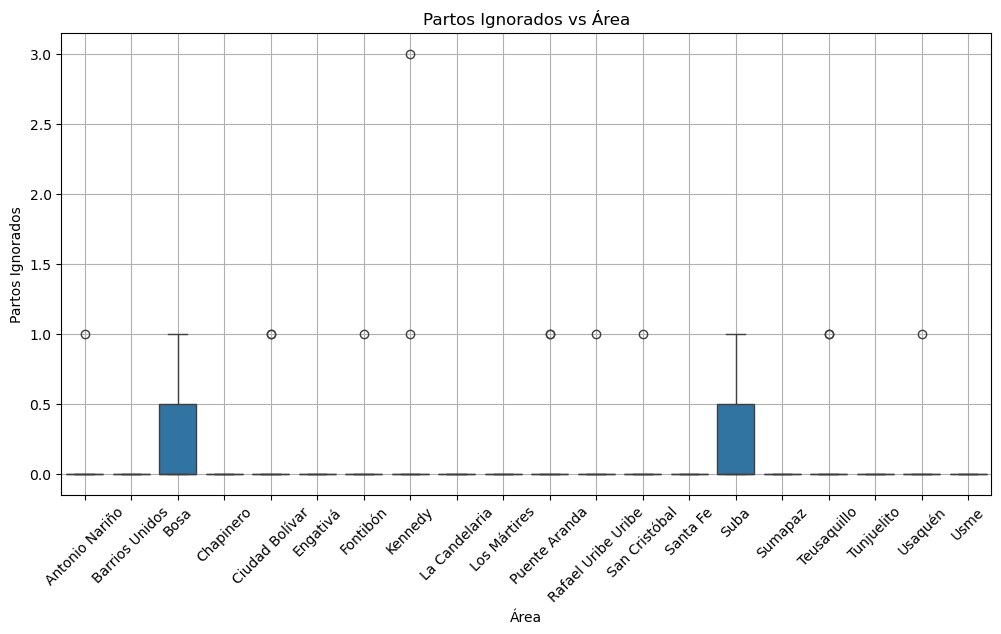

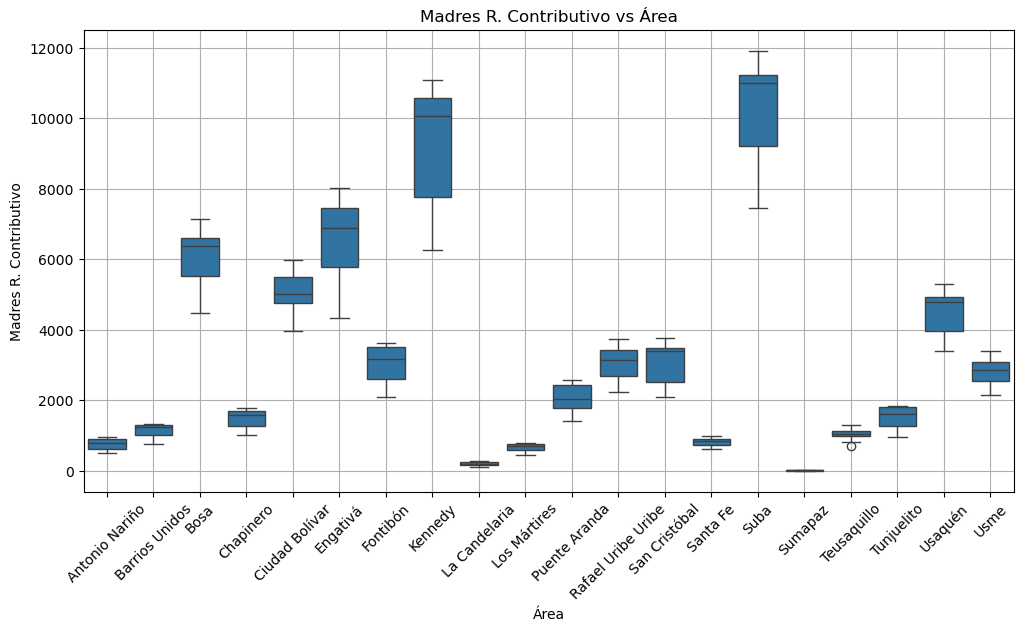

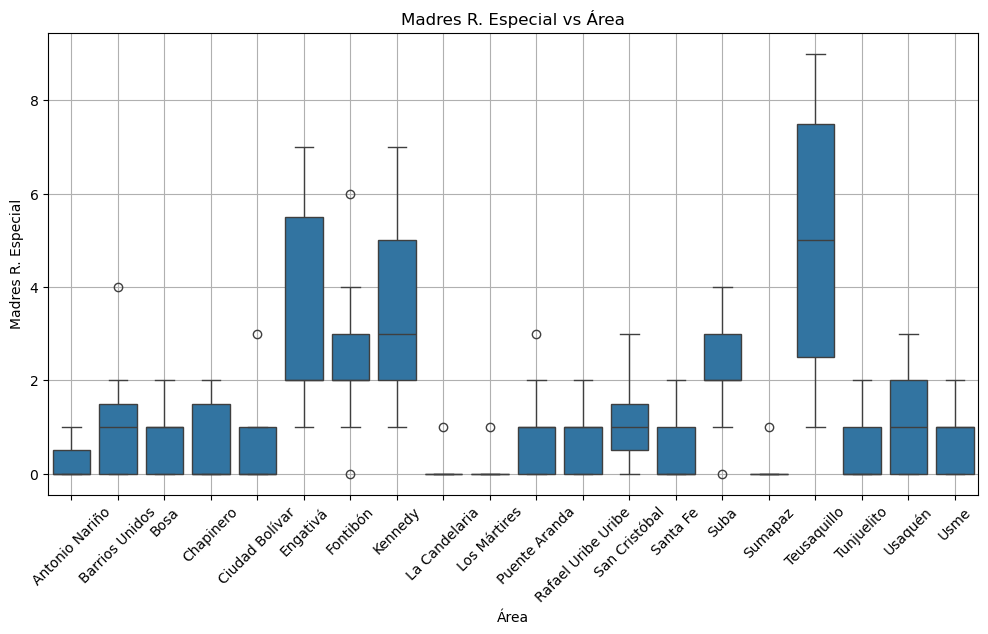

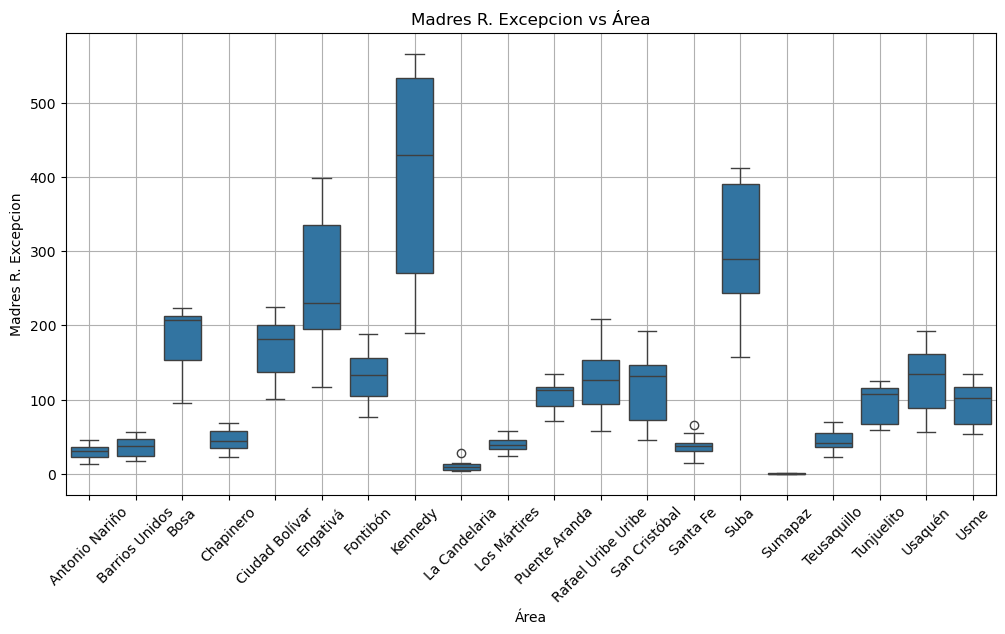

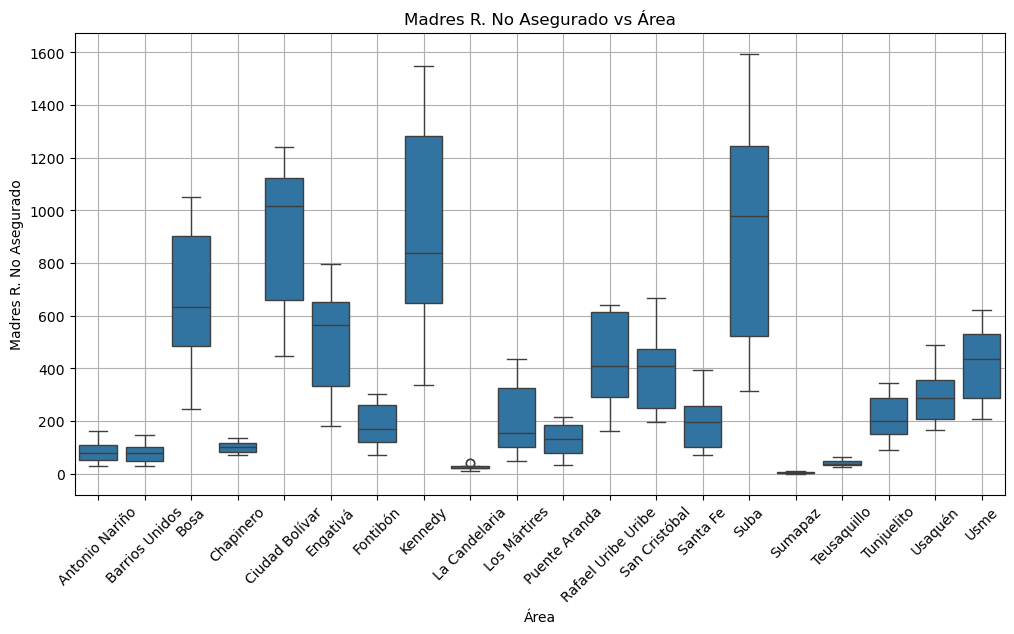

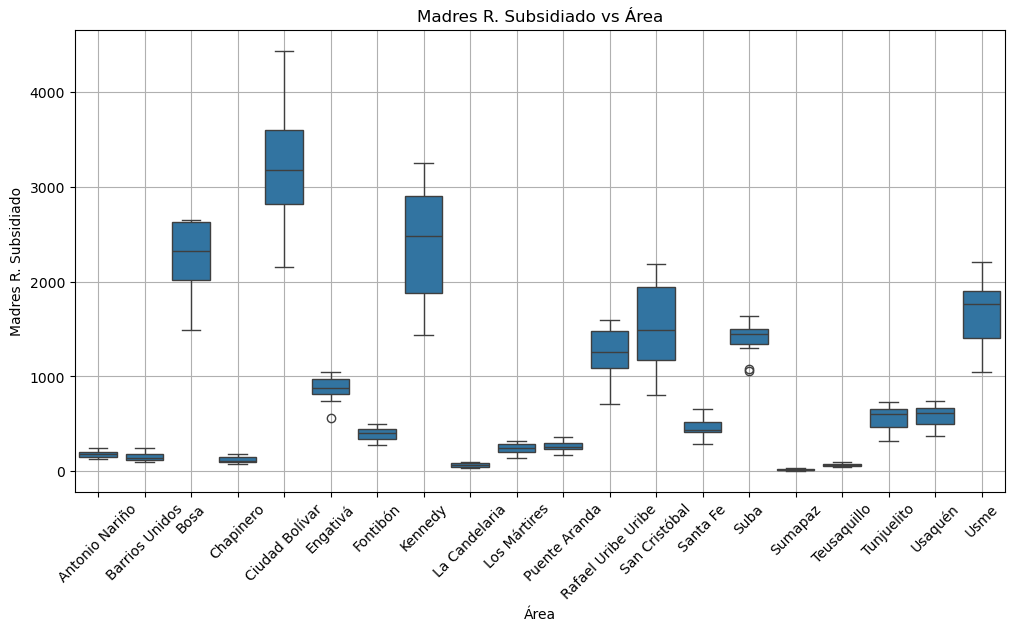

In [228]:
# Variables para comparar
variables_comparar = columnas_interes

# Comparar cada variable contra 'Año'
for column in variables_comparar:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=dff, x='Año', y=column)
    plt.title(f'{column} vs Año')
    plt.xlabel('Año')
    plt.ylabel(column)
    plt.xticks(rotation=45)  # Rotar etiquetas si hay muchos años
    plt.grid(True)
    plt.show()

# Comparar cada variable contra 'Área'
for column in variables_comparar:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=dff, x='Área', y=column)
    plt.title(f'{column} vs Área')
    plt.xlabel('Área')
    plt.ylabel(column)
    plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
    plt.grid(True)
    plt.show()


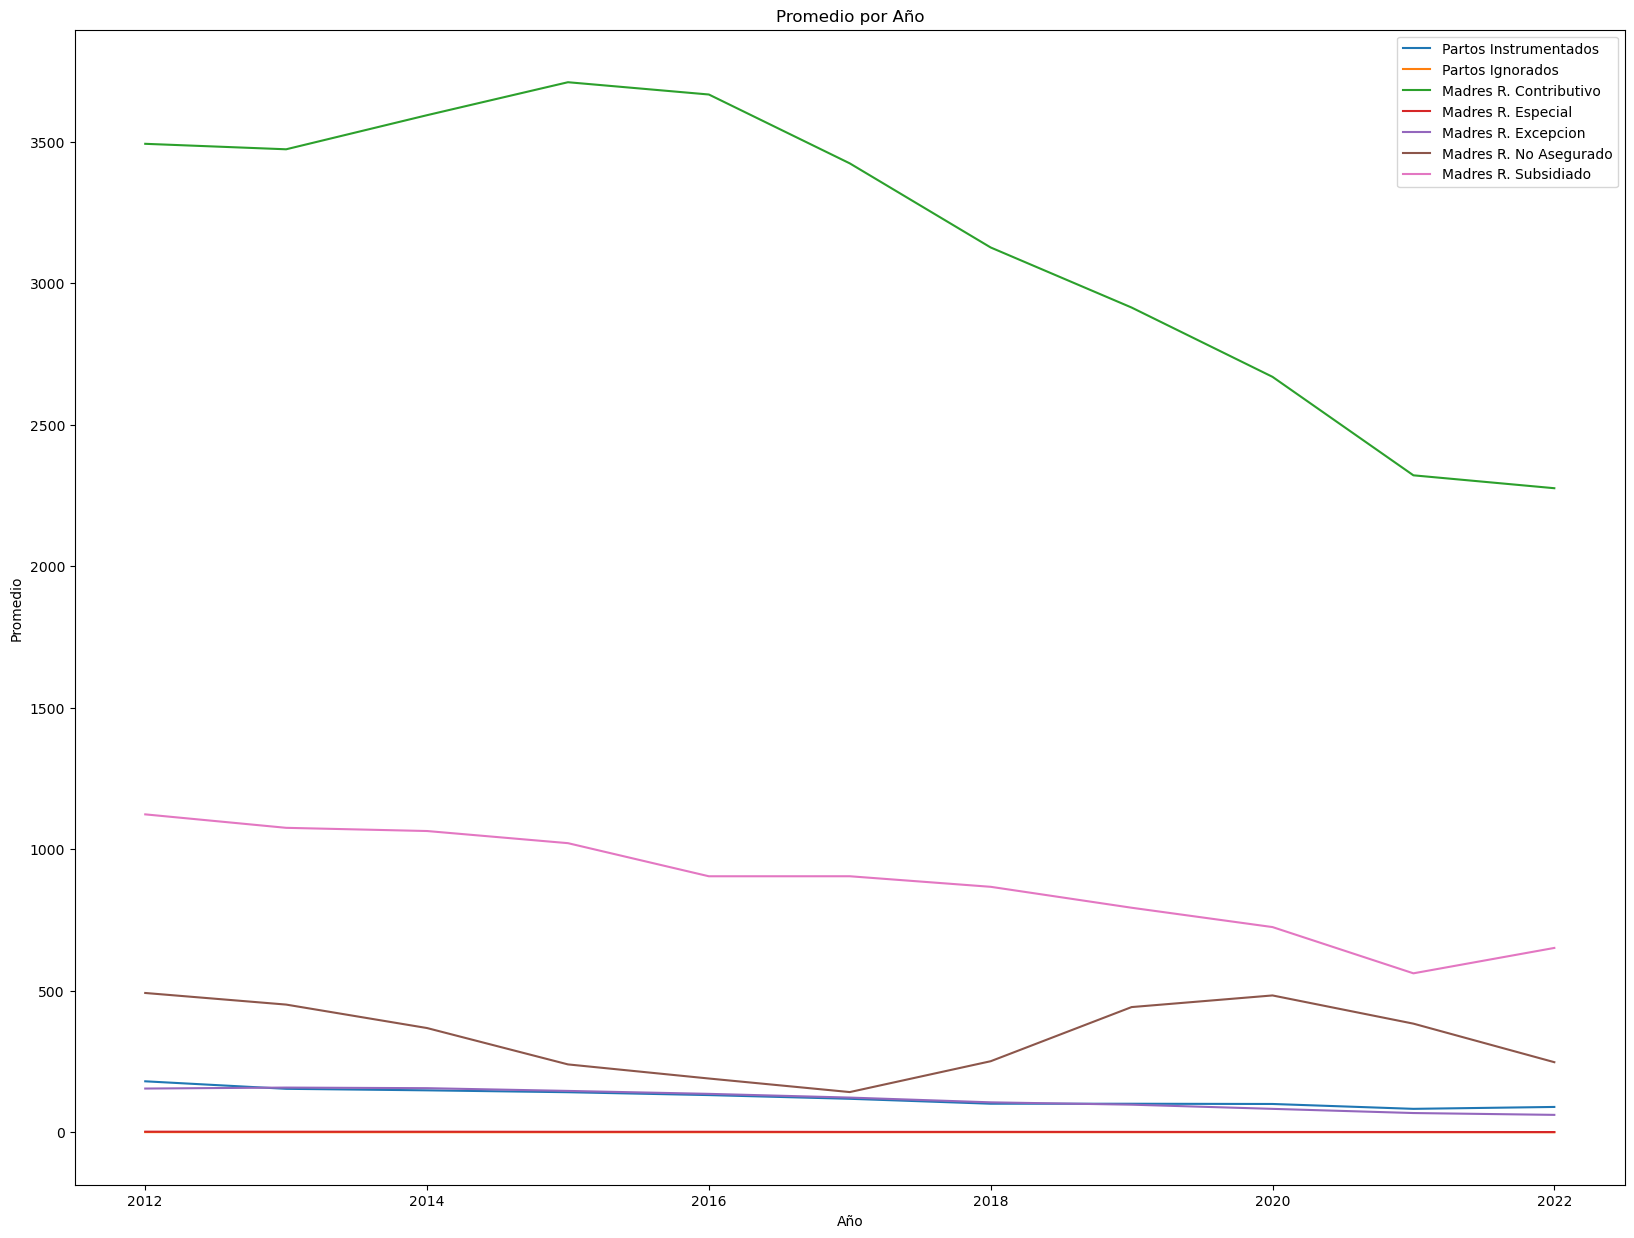

In [229]:
# Convertir a numérico (puede requerir limpieza si hay valores no convertibles)
df_numeric = dff.select_dtypes(include=['int64', 'float64'])

# Si no es numérico, intenta convertirlo (podría requerir limpieza adicional)
for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Realiza el análisis temporal solo con datos numéricos
df_numeric = df_numeric.dropna()  # Opcional: maneja NaN si ocurren durante la conversión

df_agrupado = df_numeric.groupby('Año').mean()

df_agrupado.plot(figsize=(20,15))
plt.title('Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.show()


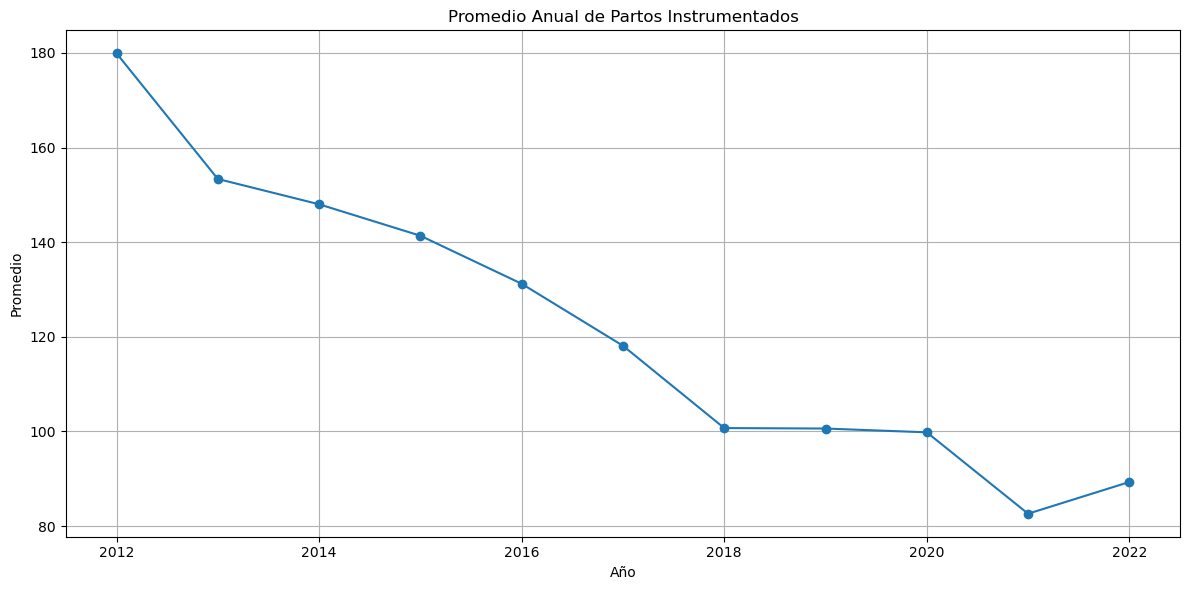

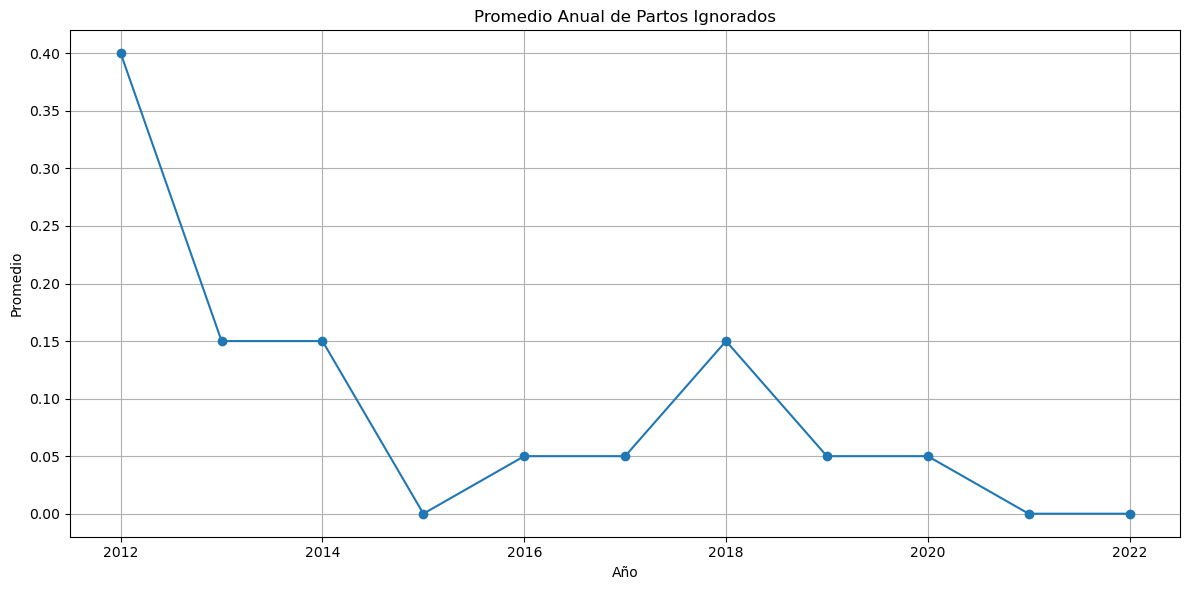

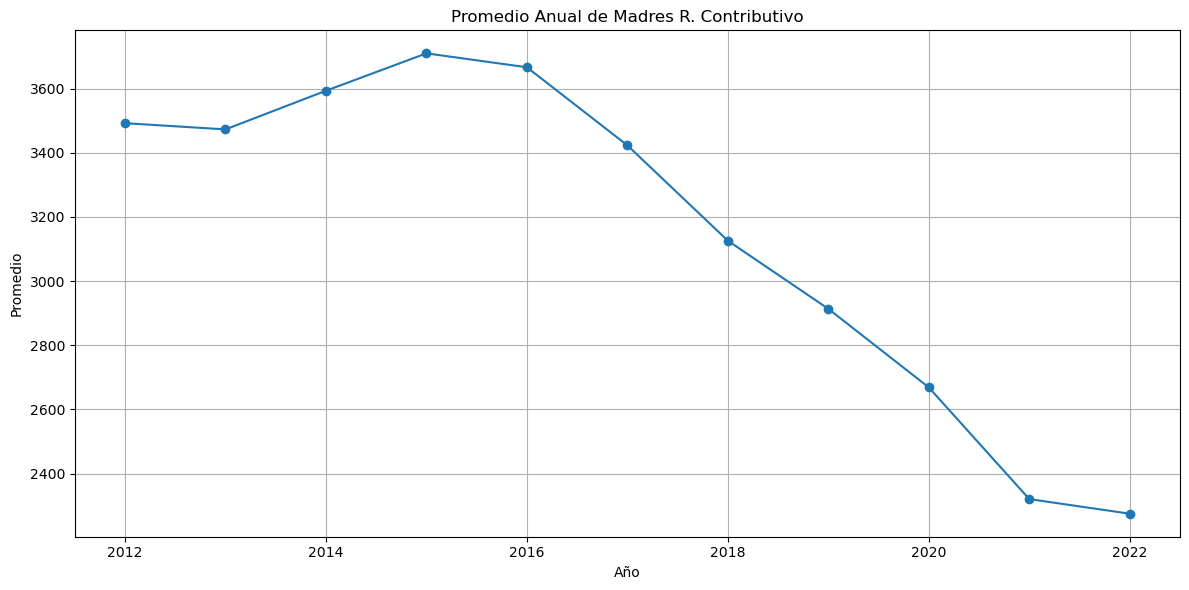

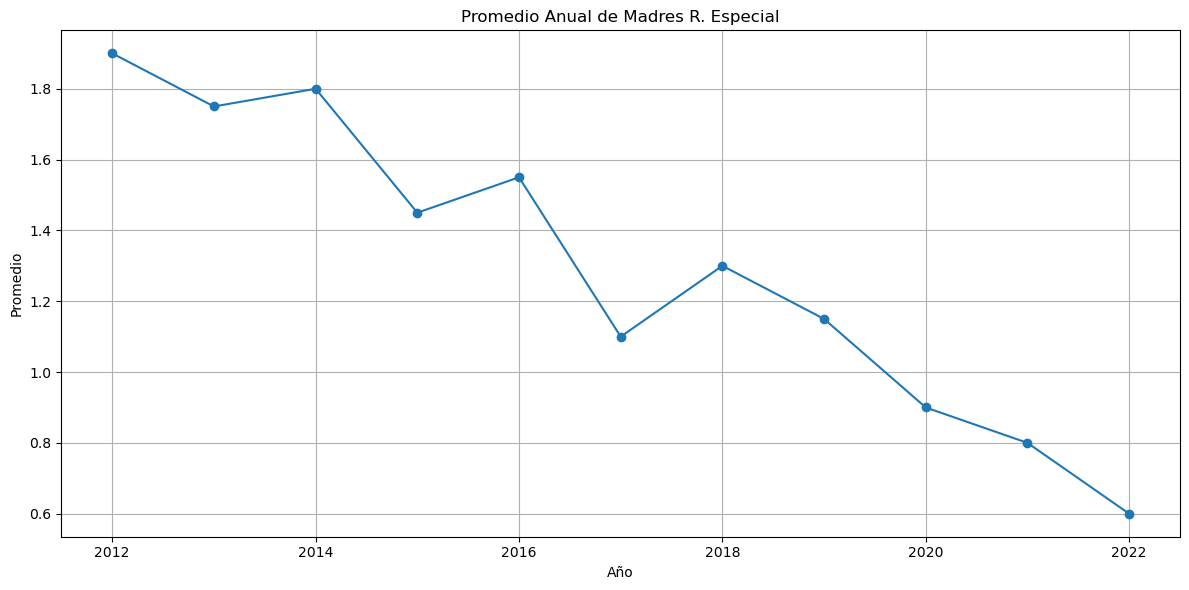

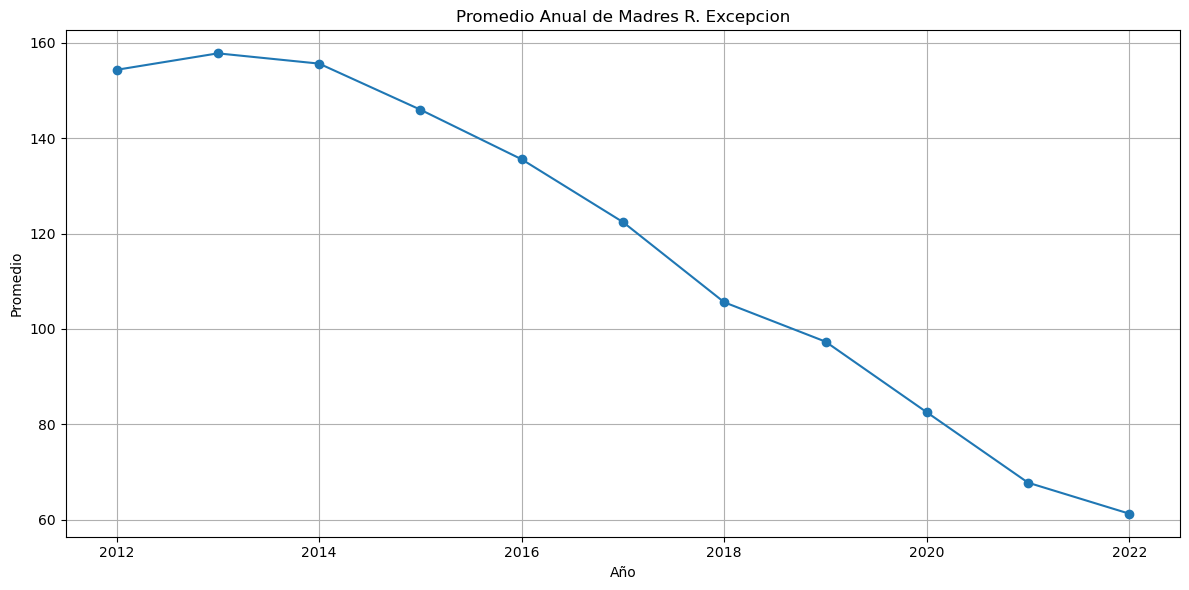

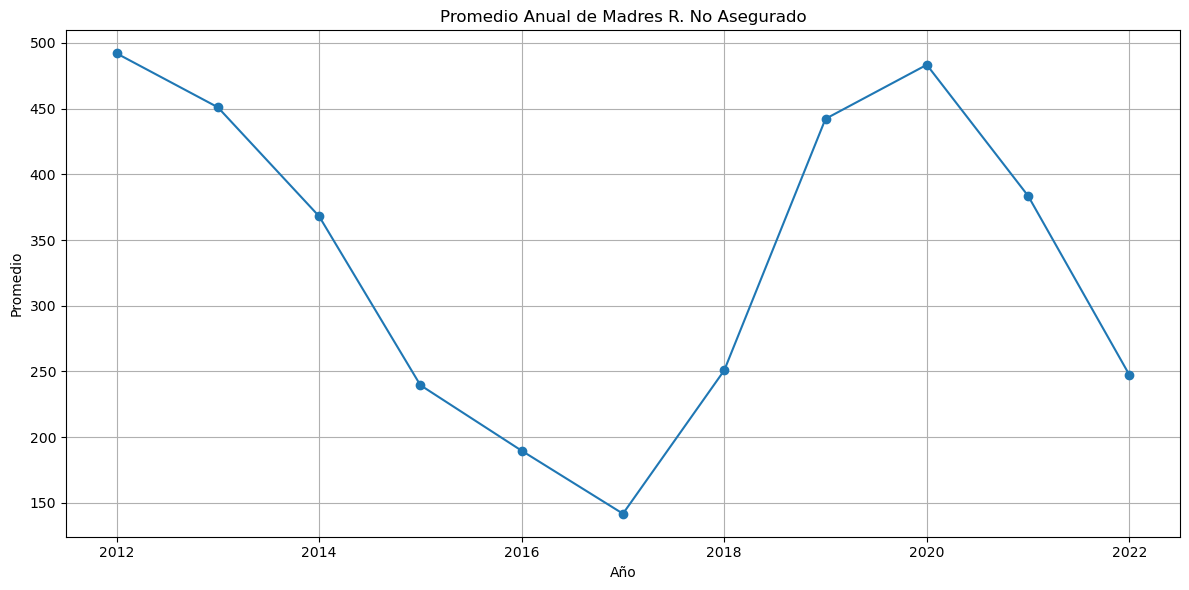

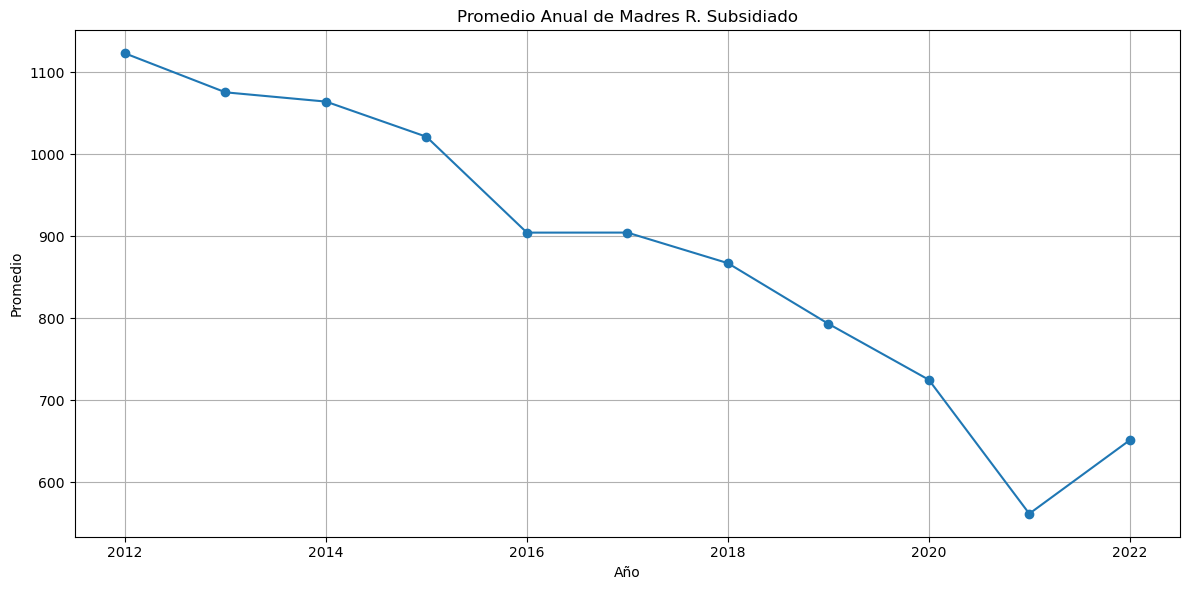

In [230]:
# Asegúrate de que 'Año' sea numérico
dff['Año'] = pd.to_numeric(dff['Año'], errors='coerce')

# Selecciona columnas numéricas
df_numeric = dff.select_dtypes(include=['int64', 'float64'])

# Elimina valores NaN en 'Año'
df_numeric = df_numeric.dropna(subset=['Año'])

# Calcular el promedio anual
promedio_anual = df_numeric.groupby('Año').mean()

# Graficar el promedio anual para cada variable individualmente
for column in promedio_anual.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(promedio_anual.index, promedio_anual[column], marker='o')
    plt.title(f'Promedio Anual de {column}')
    plt.xlabel('Año')
    plt.ylabel('Promedio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Bivariado

In [234]:
mi = pd.read_excel("Mortalidad Infantil con Pobreza.xlsx",engine="openpyxl")
mi.drop(["Columna1"],axis=1,inplace=True)

## Correlaciones

In [235]:
numericas = list(mi.columns)
numericas.remove("Año")
numericas.remove("Área")

In [236]:
mi[numericas] = mi[numericas].apply(lambda x: x.astype(str).str.replace(",", "."))
mi[numericas] = mi[numericas].astype(float)

In [237]:
actuales = list(mi.sort_values(by=["Año","Área"])["Población"].values)
pasados = [24679, 43127, 185297, 45992, 167959, 232460, 104304, 289771, 
           5086, 22708, 69963, 102987, 109528, 28151, 324375, 885, 
           42628, 49399, 150634, 96258] + actuales[:-20]

mi = mi.sort_values(by=["Año","Área"])
mi["Tasa crecimiento poblacional"] = (np.array(actuales) - np.array(pasados)) / np.array(pasados) * 100
numericas.append("Tasa crecimiento poblacional")

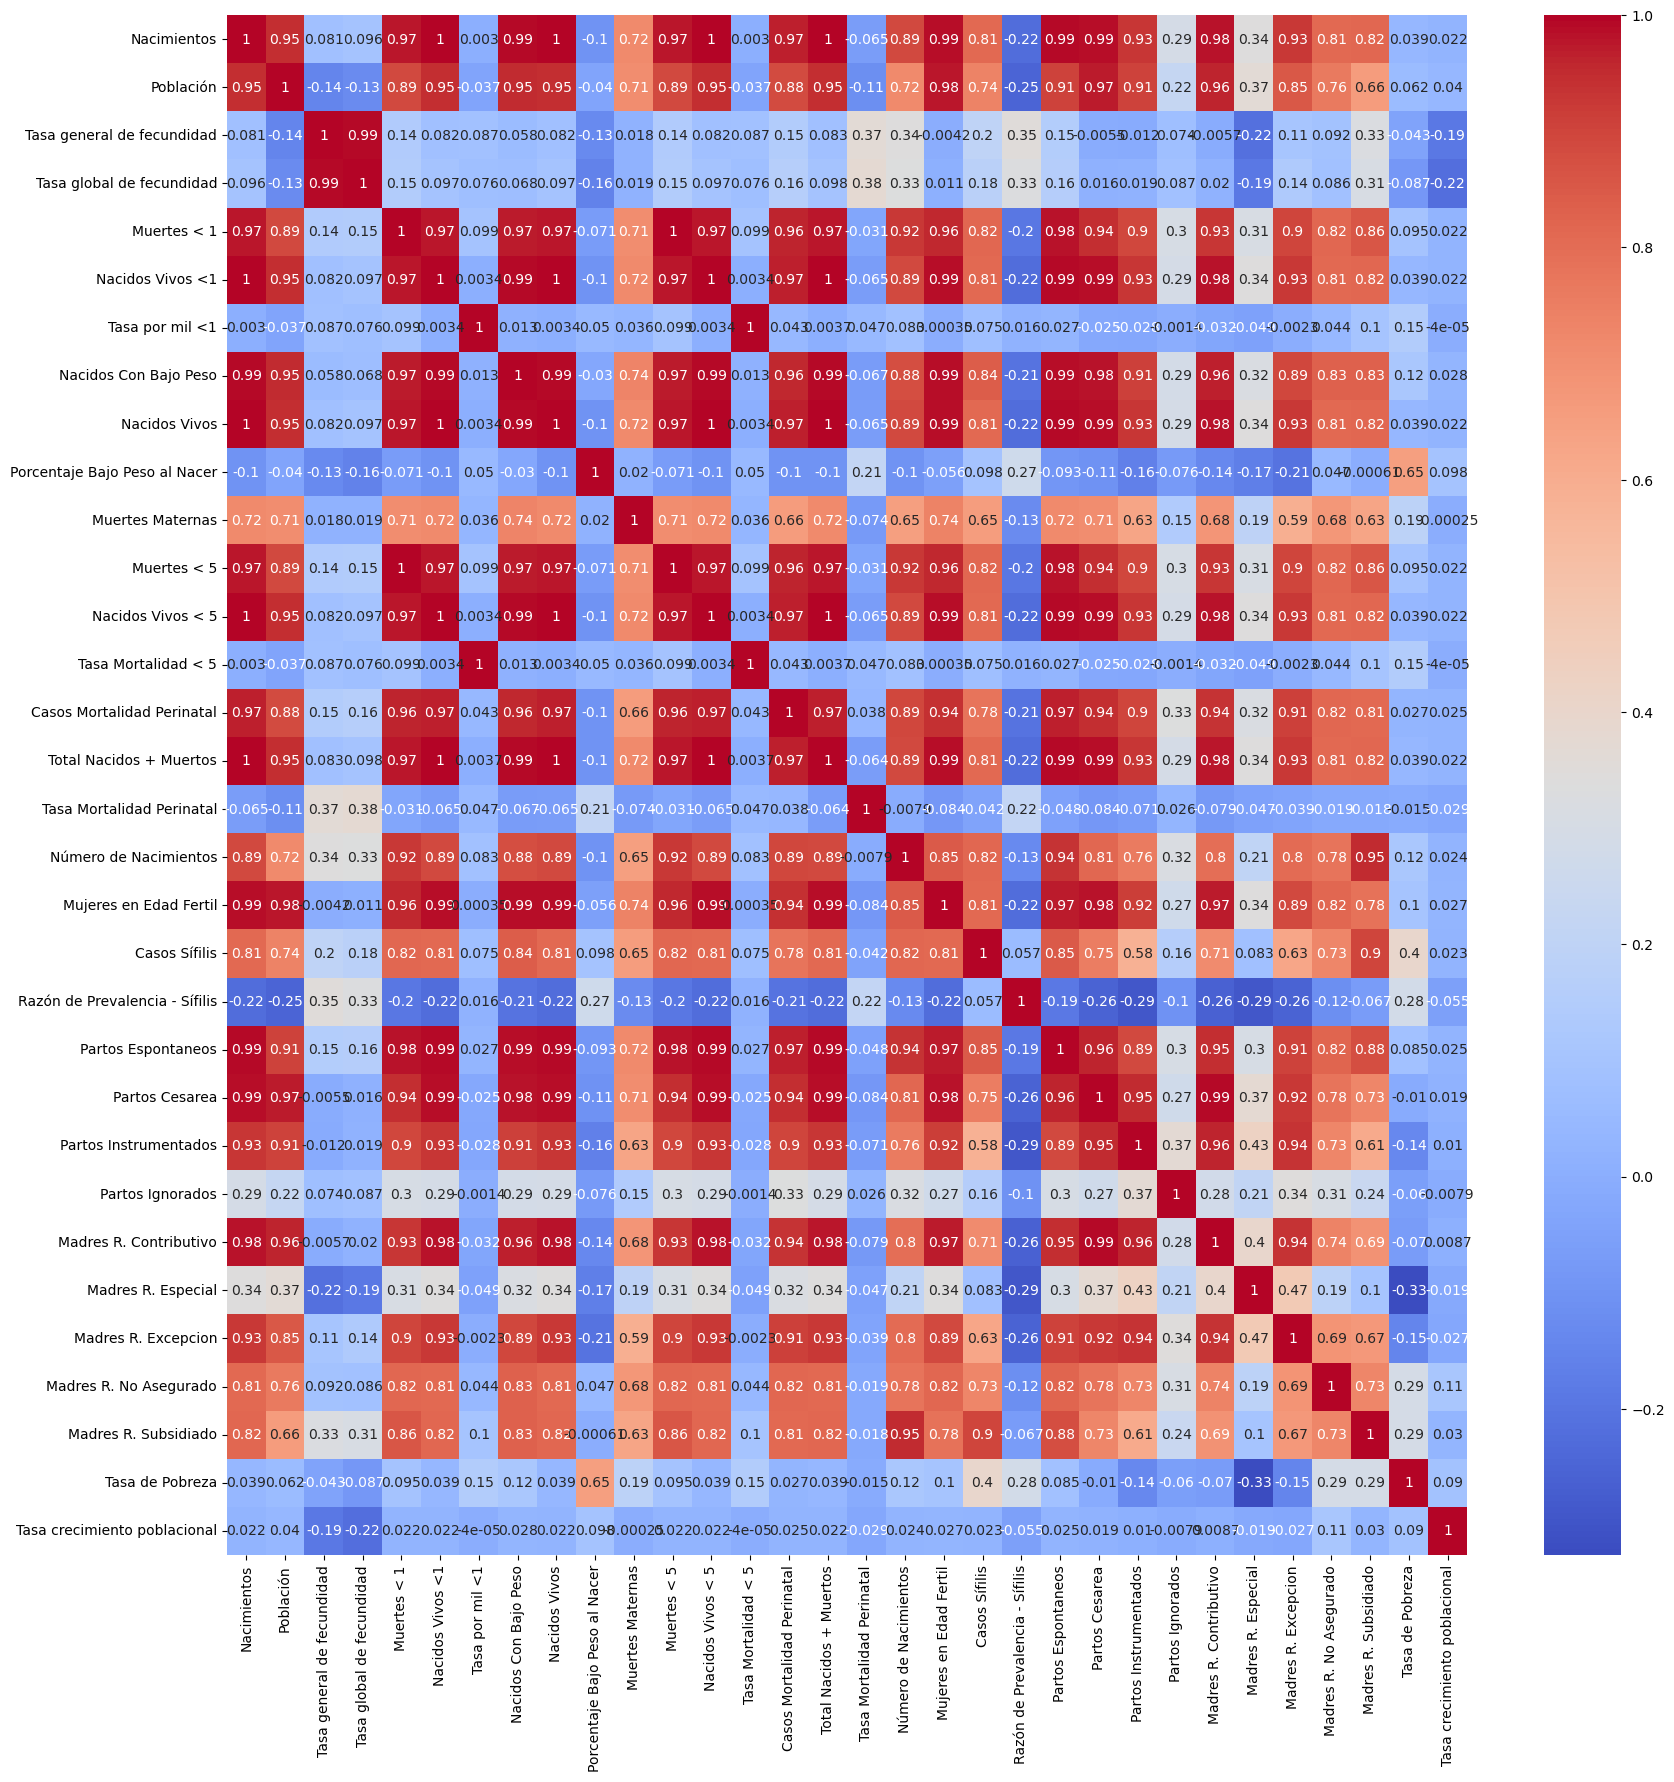

In [238]:
plt.figure(figsize=(20, 20))
sns.heatmap(mi[numericas].corr(),annot=True, cmap="coolwarm")
plt.show()

Se observa que hay mucha correlación entre las variables, entonces se filtran para obtener las más significativas (>0.85)

In [239]:
variables = ["Tasa general de fecundidad","Tasa global de fecundidad","Tasa por mil <1",
             "Porcentaje Bajo Peso al Nacer","Muertes Maternas","Tasa Mortalidad < 5",
             "Tasa Mortalidad Perinatal","Número de Nacimientos","Casos Sífilis","Razón de Prevalencia - Sífilis",
             "Partos Espontaneos","Partos Cesarea","Partos Instrumentados",'Madres R. Contributivo', 'Madres R. Excepcion',
       'Madres R. No Asegurado', 'Madres R. Subsidiado','Tasa crecimiento poblacional',"Tasa de Pobreza"]

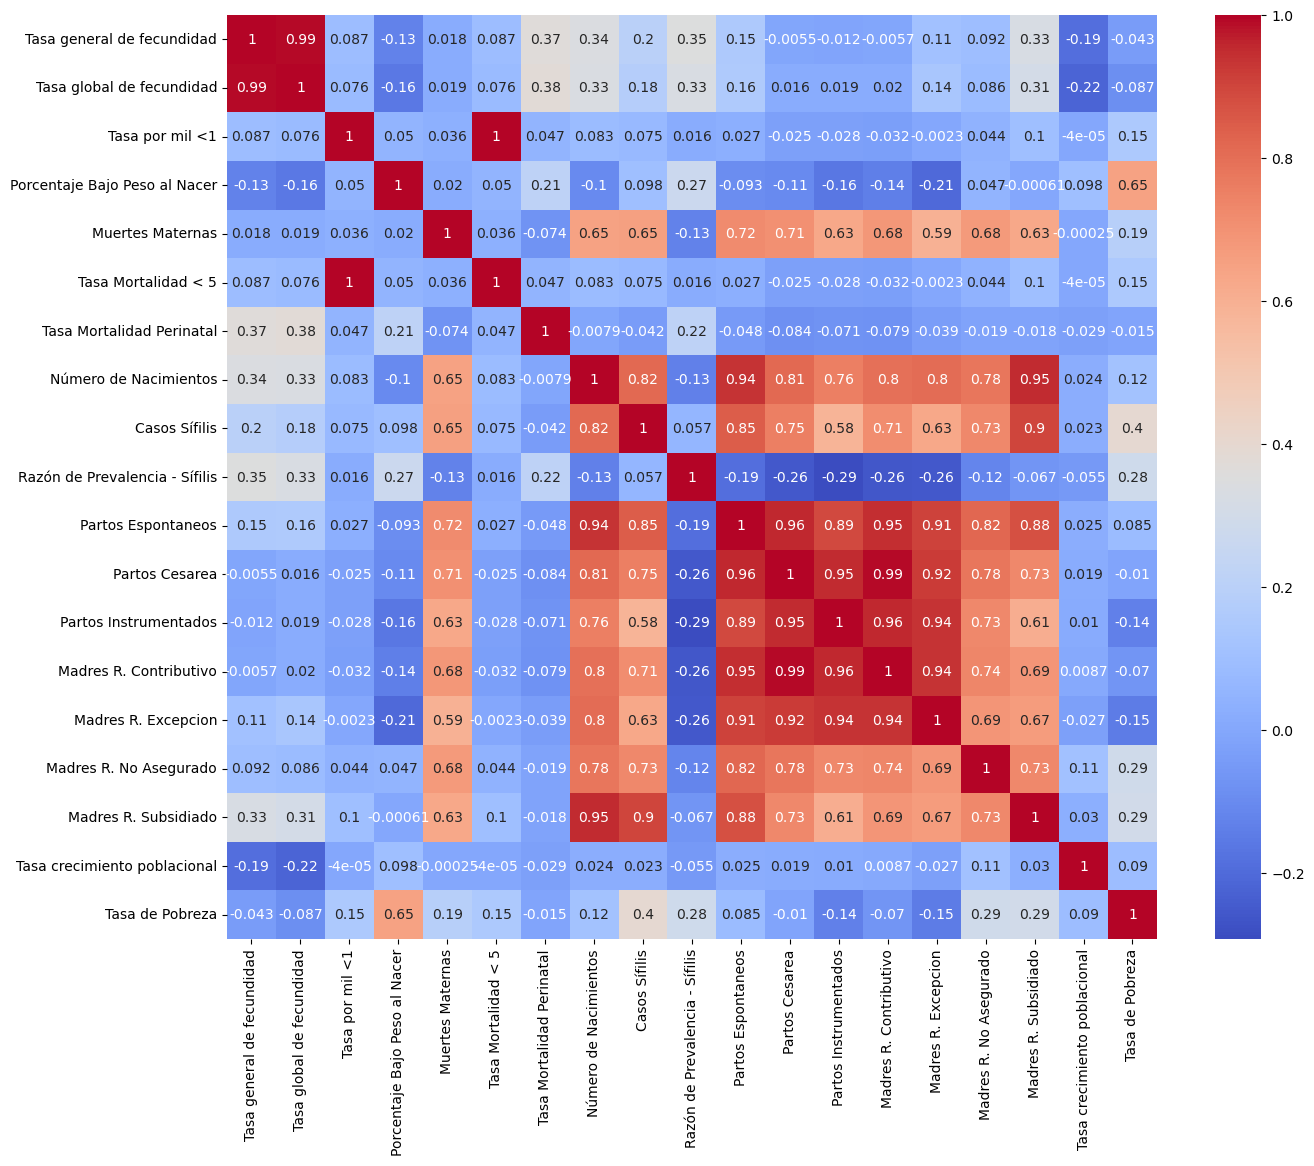

In [240]:
plt.figure(figsize=(15, 12))
sns.heatmap(mi[variables].corr(),annot=True, cmap="coolwarm")
plt.show()

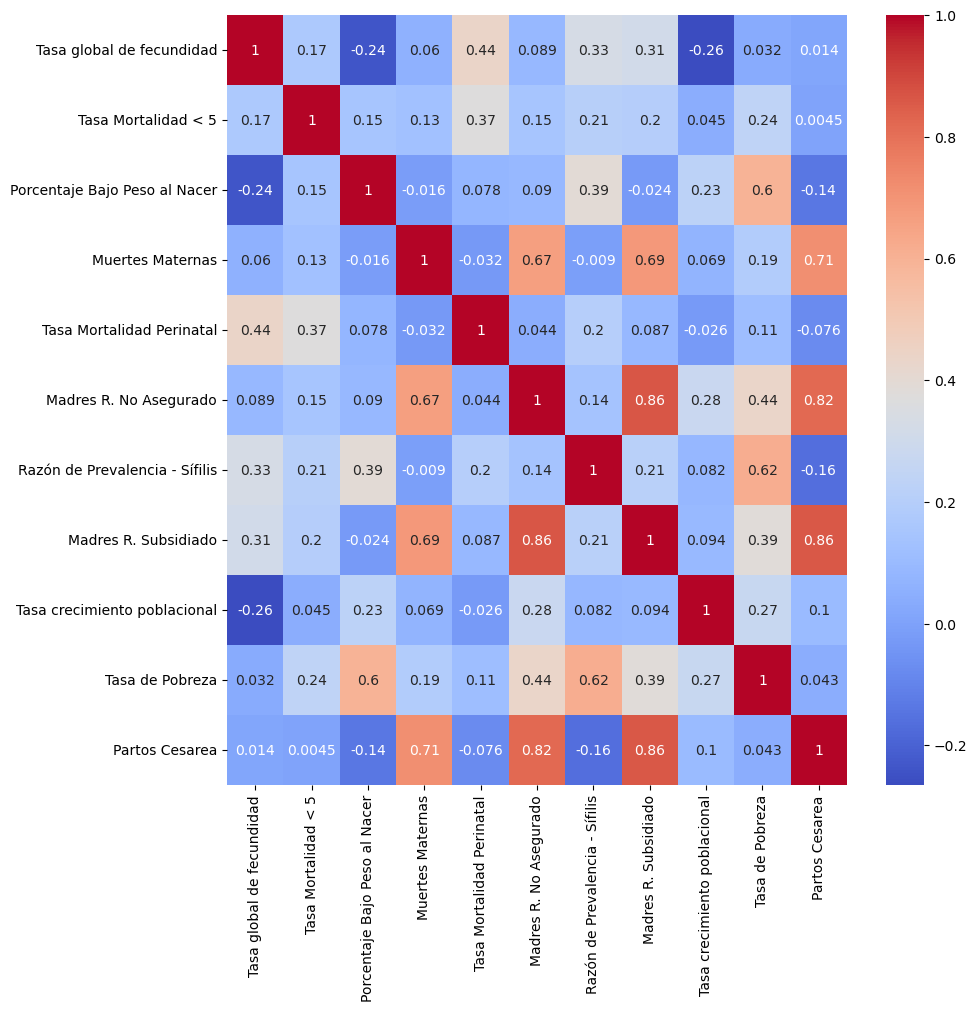

In [241]:
variables2 = ["Tasa global de fecundidad","Tasa Mortalidad < 5","Porcentaje Bajo Peso al Nacer",
              "Muertes Maternas","Tasa Mortalidad Perinatal","Madres R. No Asegurado",
              "Razón de Prevalencia - Sífilis","Madres R. Subsidiado",
              "Tasa crecimiento poblacional","Tasa de Pobreza","Partos Cesarea"]

plt.figure(figsize=(10, 10))
sns.heatmap(mi[variables2].corr("spearman"),annot=True, cmap="coolwarm")
plt.show()

## Dependencias

In [244]:
for i in variables2:
    stat, p = sp.stats.shapiro(mi[i])
    if p > 0.05:
        print(f"{i} - Normal")
    else:
        print(f"{i} - No normal")

Tasa global de fecundidad - No normal
Tasa Mortalidad < 5 - No normal
Porcentaje Bajo Peso al Nacer - No normal
Muertes Maternas - No normal
Tasa Mortalidad Perinatal - No normal
Madres R. No Asegurado - No normal
Razón de Prevalencia - Sífilis - No normal
Madres R. Subsidiado - No normal
Tasa crecimiento poblacional - No normal
Tasa de Pobreza - No normal
Partos Cesarea - No normal


In [245]:
for i in variables2:
    grouped_data = [mi[i].values for name, group in mi.groupby("Año")]
    stat, p = sp.stats.kruskal(*grouped_data)
    if p > 0.05:
        print(f"{i} - Independientes")
    else:
        print(f"{i} - Dependencia")

Tasa global de fecundidad - Independientes
Tasa Mortalidad < 5 - Independientes
Porcentaje Bajo Peso al Nacer - Independientes
Muertes Maternas - Independientes
Tasa Mortalidad Perinatal - Independientes
Madres R. No Asegurado - Independientes
Razón de Prevalencia - Sífilis - Independientes
Madres R. Subsidiado - Independientes
Tasa crecimiento poblacional - Independientes
Tasa de Pobreza - Dependencia
Partos Cesarea - Independientes


In [246]:
for i in variables2:
    grouped_data = [mi[i].values for name, group in mi.groupby("Área")]
    stat, p = sp.stats.kruskal(*grouped_data)
    if p > 0.05:
        print(f"{i} - Independientes")
    else:
        print(f"{i} - Dependencia")

Tasa global de fecundidad - Independientes
Tasa Mortalidad < 5 - Independientes
Porcentaje Bajo Peso al Nacer - Independientes
Muertes Maternas - Independientes
Tasa Mortalidad Perinatal - Independientes
Madres R. No Asegurado - Independientes
Razón de Prevalencia - Sífilis - Independientes
Madres R. Subsidiado - Independientes
Tasa crecimiento poblacional - Independientes
Tasa de Pobreza - Dependencia
Partos Cesarea - Independientes


## Exportación

In [ ]:
mi[variables2] = np.round(mi[variables2],3)

In [ ]:
mi[variables2]

Tasa global de fecundidad  Tasa Mortalidad < 5  \
0                         1.50                 14.3   
11                        1.40                 10.1   
22                        1.70                 13.6   
33                        1.50                 10.6   
44                        2.00                 15.4   
..                         ...                  ...   
175                       0.87                 43.5   
186                       0.58                  9.4   
197                       1.05                 12.1   
208                       0.84                 11.7   
219                       1.02                 15.5   

     Porcentaje Bajo Peso al Nacer  Muertes Maternas  \
0                             12.3               0.0   
11                            13.0               0.0   
22                            12.7               6.0   
33                            14.3               0.0   
44                            12.9               5.0   
..                             ...               ...   
175                            8.7               0.0   
186                           14.2               1.0   
197                           15.1               0.0   
208                           14.6               2.0   
219                           16.6               1.0   

     Tasa Mortalidad Perinatal  Madres R. No Asegurado  \
0                         15.9                   108.0   
11                        15.9                   120.0   
22                        14.0                   964.0   
33                        13.3                   106.0   
44                        16.3                  1225.0   
..                         ...                     ...   
175                        0.0                     0.0   
186                       10.4                    36.0   
197                       13.2                   170.0   
208                        9.2                   190.0   
219                       14.2                   266.0   

     Razón de Prevalencia - Sífilis  Madres R. Subsidiado  \
0                            10.582                 191.0   
11                            4.700                 195.0   
22                            5.148                2635.0   
33                            1.427                 180.0   
44                            6.893                4435.0   
..                              ...                   ...   
175                           0.000                  12.0   
186                           9.404                  80.0   
197                          11.927                 380.0   
208                           4.027                 443.0   
219                          12.700                1078.0   

     Tasa crecimiento poblacional  Tasa de Pobreza  Partos Cesarea  
0                          -2.285            14.90           411.0  
11                         -3.499            14.72           728.0  
22                          2.540            30.52          3745.0  
33                          0.861            15.52          1126.0  
44                          0.873            37.00          3615.0  
..                            ...              ...             ...  
175                         2.091              NaN             7.0  
186                         0.848            10.20           504.0  
197                        -1.453            45.34           694.0  
208                         0.264            20.22          2395.0  
219                         0.352            65.80          1456.0  

[220 rows x 11 columns]

In [ ]:
variables2 += ["Año","Área"]
#mi = mi[variables2]
#mi.to_csv("Mortalidad Infantil - Final.csv",sep=";")
#mi.to_excel("Mortalidad Infantil - Final.xlsx",engine="openpyxl")

In [ ]:
variables2

['Tasa global de fecundidad',
 'Tasa Mortalidad < 5',
 'Porcentaje Bajo Peso al Nacer',
 'Muertes Maternas',
 'Tasa Mortalidad Perinatal',
 'Madres R. No Asegurado',
 'Razón de Prevalencia - Sífilis',
 'Madres R. Subsidiado',
 'Tasa crecimiento poblacional',
 'Tasa de Pobreza',
 'Partos Cesarea',
 'Año',
 'Área']

## Gráficas

### Año y Área

In [247]:
mi["Área"].unique()

array(['Antonio Nariño', 'Barrios Unidos', 'Bosa', 'Chapinero',
       'Ciudad Bolívar', 'Engativá', 'Fontibón', 'Kennedy',
       'La Candelaria', 'Los Mártires', 'Puente Aranda',
       'Rafael Uribe Uribe', 'San Cristóbal', 'Santa Fe', 'Suba',
       'Sumapaz', 'Teusaquillo', 'Tunjuelito', 'Usaquén', 'Usme'],
      dtype=object)

In [248]:
mi.loc[:,"Zona"] = np.where(mi["Área"].isin(["Usme","Sumapaz","Tunjuelito","Ciudad Bolivar"]),"Sur",
                               np.where(mi["Área"].isin(["Chapinero", "Engativá", "Usaquén", "Suba","Teusaquillo","Barrios Unidos"]),"Norte",
                                        np.where(mi["Área"].isin(["Kennedy", "Bosa", "Puente Aranda", "Fontibón"]),"Sur-Occidente",
                                                 "Centro-Oriente")))

C:\Users\samue\AppData\Local\Temp\ipykernel_7292\1205620722.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mi, x="Año", y="Tasa Mortalidad < 5", hue="Zona", palette=palette, ci=None)


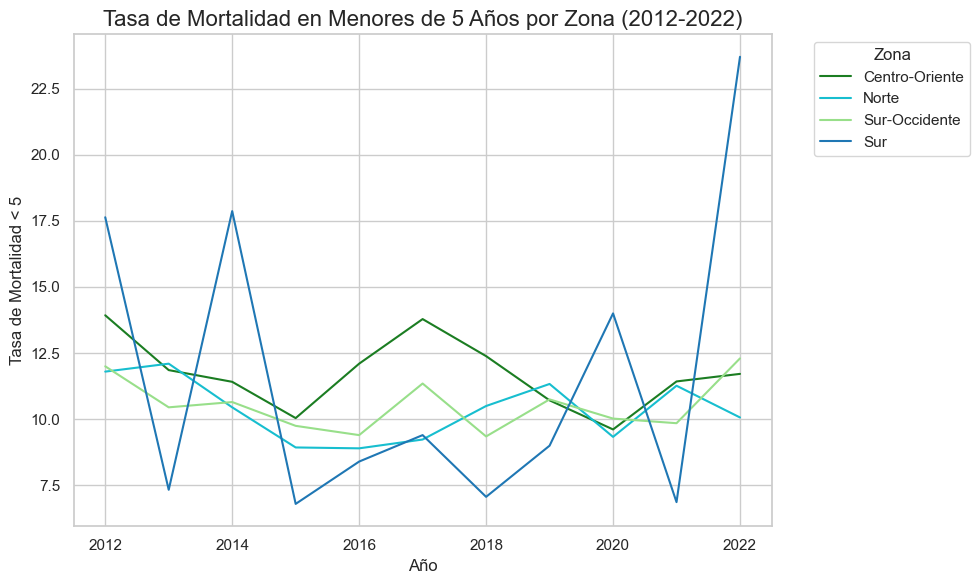

In [249]:
sns.set(style="whitegrid")
palette = [ "#1b7d22", "#17becf", "#98df8a","#1f77b4"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=mi, x="Año", y="Tasa Mortalidad < 5", hue="Zona", palette=palette, ci=None)

plt.title("Tasa de Mortalidad en Menores de 5 Años por Zona (2012-2022)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Tasa de Mortalidad < 5", fontsize=12)

plt.legend(title="Zona", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


### Regímenes

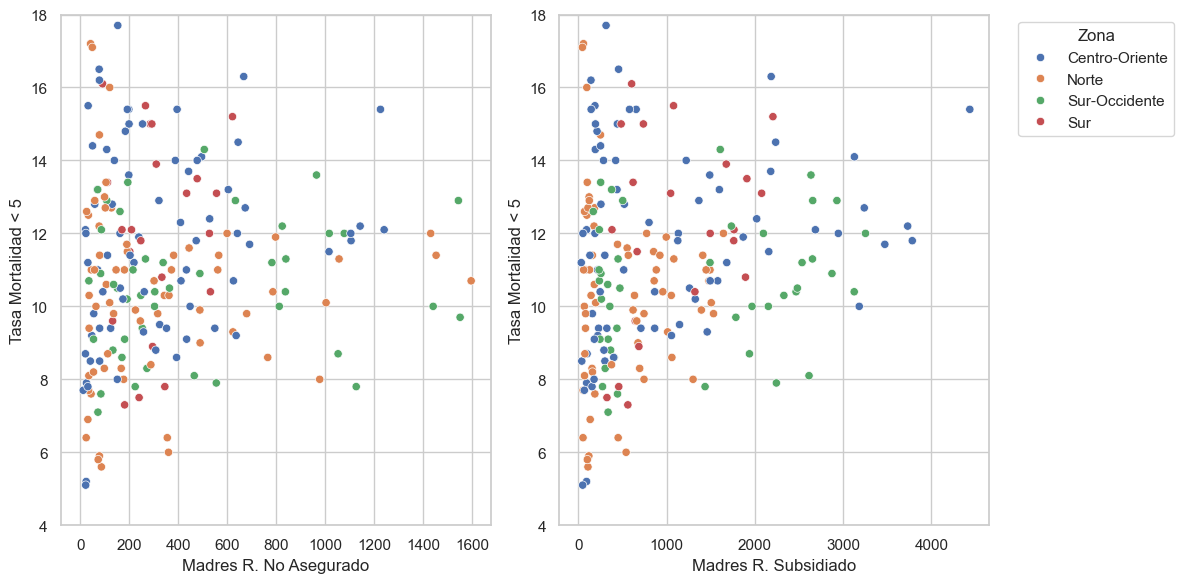

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
                      
sns.scatterplot(x = "Madres R. No Asegurado", y = "Tasa Mortalidad < 5", hue = "Zona", data = mi, ax= ax[0])
sns.scatterplot(x = "Madres R. Subsidiado", y = "Tasa Mortalidad < 5", hue = "Zona", data = mi, ax= ax[1])
ax[0].set_ylim((4,18))
ax[1].set_ylim((4,18))
ax[0].legend().set_visible(False)
ax[1].legend(title="Zona", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Pobreza

In [ ]:
mi.loc[:, "Año int"] = np.where(
    mi["Año"].isin([2012, 2013, 2014]), "2012-2014",
    np.where(
        mi["Año"].isin([2015, 2016, 2017]), "2015-2017",
        np.where(
            mi["Año"].isin([2018, 2019, 2020]), "2018-2020",
            np.where(mi["Año"].isin([2021, 2022]), "2021-2022", "")
        )
    )
)


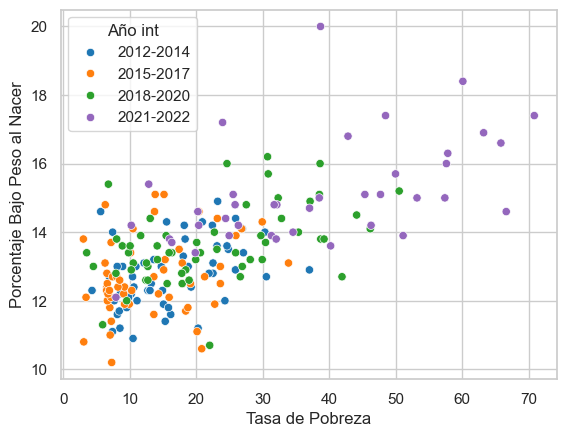

In [ ]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd"]

sns.scatterplot(x = "Tasa de Pobreza", y = "Porcentaje Bajo Peso al Nacer", hue="Año int", data = mi, palette = custom_palette)
plt.show()

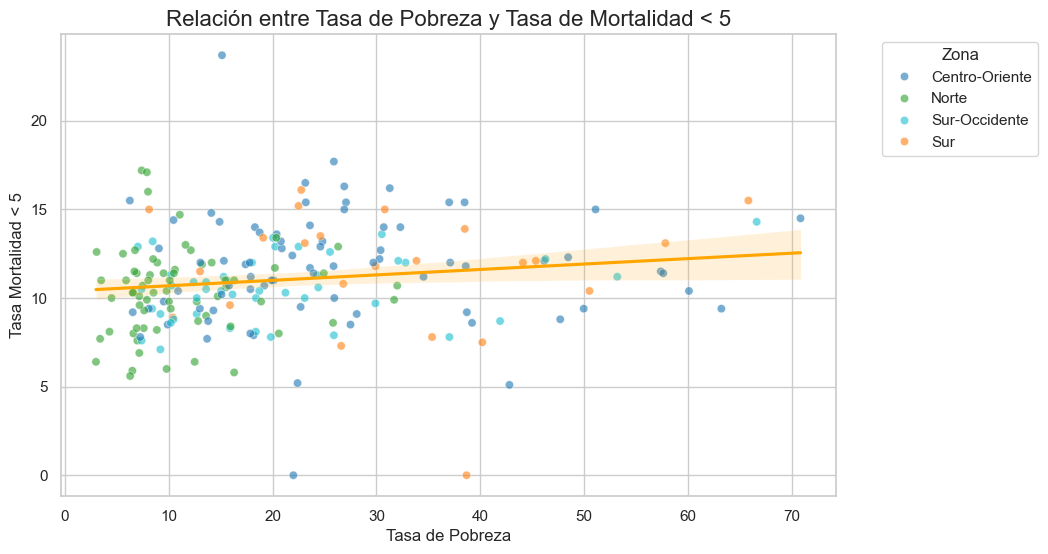

In [ ]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette(["#1f77b4", "#2ca02c", "#17becf", "#ff7f0e"])
sns.scatterplot(x="Tasa de Pobreza", y="Tasa Mortalidad < 5", data=mi, hue="Zona", alpha=0.6, palette=palette)
sns.regplot(x="Tasa de Pobreza", y="Tasa Mortalidad < 5", data=mi, scatter=False, color='orange')
plt.title('Relación entre Tasa de Pobreza y Tasa de Mortalidad < 5', fontsize=16)
plt.legend(title="Zona", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Tasa de Pobreza', fontsize=12)
plt.ylabel('Tasa Mortalidad < 5', fontsize=12)
plt.show()

### Maternidad

In [ ]:
mi["Tasa Mortalidad < 5"].describe()

count    220.000000
mean      11.064091
std        4.329893
min        0.000000
25%        9.175000
50%       11.000000
75%       12.725000
max       43.500000
Name: Tasa Mortalidad < 5, dtype: float64

In [ ]:
mi["Mortalidad int"] = np.where(mi["Tasa Mortalidad < 5"] <= 9.175, "Muy Baja",
                                np.where(mi["Tasa Mortalidad < 5"] <= 11, "Baja",
                                np.where(mi["Tasa Mortalidad < 5"] <= 12.725, "Alta",
                                "Muy Alta")))

In [ ]:
mi.columns

Index(['Año', 'Área', 'Nacimientos', 'Población', 'Tasa general de fecundidad',
       'Tasa global de fecundidad', 'Muertes < 1', 'Nacidos Vivos <1',
       'Tasa por mil <1', 'Nacidos Con Bajo Peso', 'Nacidos Vivos',
       'Porcentaje Bajo Peso al Nacer', 'Muertes Maternas', 'Muertes < 5',
       'Nacidos Vivos < 5', 'Tasa Mortalidad < 5',
       'Casos Mortalidad Perinatal', 'Total Nacidos + Muertos',
       'Tasa Mortalidad Perinatal', 'Número de Nacimientos',
       'Mujeres en Edad Fertil', 'Casos Sífilis',
       'Razón de Prevalencia - Sífilis', 'Partos Espontaneos',
       'Partos Cesarea', 'Partos Instrumentados', 'Partos Ignorados',
       'Madres R. Contributivo', 'Madres R. Especial', 'Madres R. Excepcion',
       'Madres R. No Asegurado', 'Madres R. Subsidiado', 'Tasa de Pobreza',
       'Tasa crecimiento poblacional', 'Zona', 'Año int', 'Mortalidad int'],
      dtype='object')

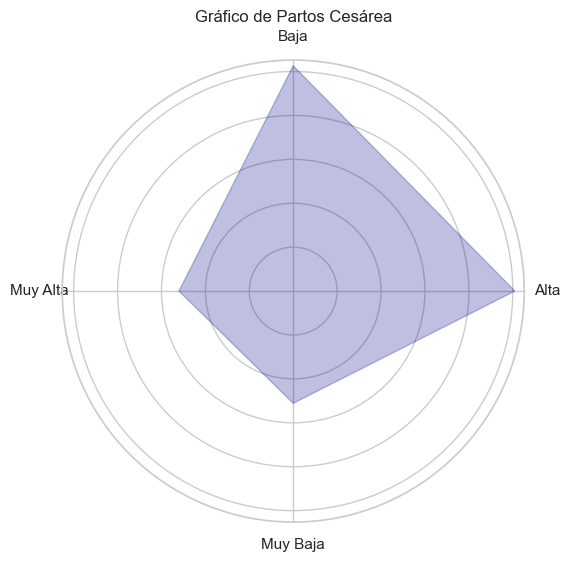

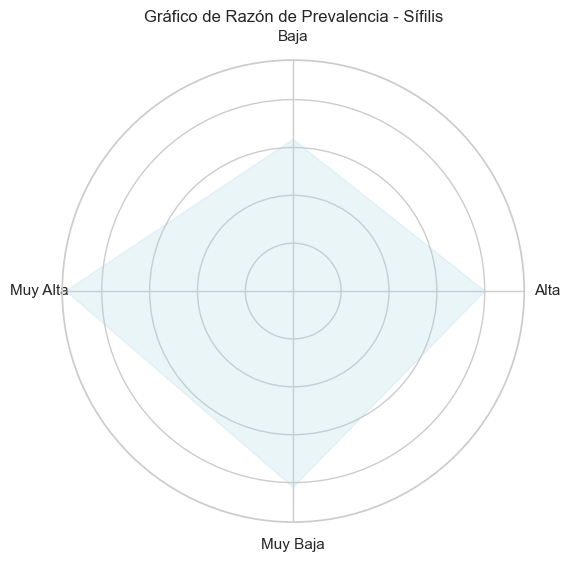

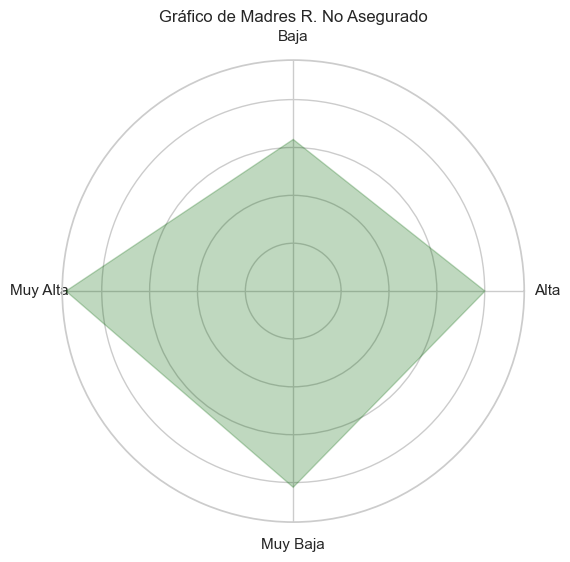

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame ya está cargado
# mi = pd.DataFrame({
#     'Mortalidad int': ['Categoría 1', 'Categoría 2', 'Categoría 3'],
#     "Partos Cesarea": [10, 20, 15],
#     "Razón de Prevalencia - Sífilis": [12, 22, 17]
# })

# Agrupar los datos por "Mortalidad int" y calcular las medias
grouped_partos = mi.groupby('Mortalidad int')["Partos Cesarea"].mean().reset_index()
grouped_sifilis = mi.groupby('Mortalidad int')["Razón de Prevalencia - Sífilis"].mean().reset_index()
grouped_asegurado = mi.groupby('Mortalidad int')["Madres R. No Asegurado"].mean().reset_index()

# Número de variables (categorías)
num_vars = len(grouped_partos)

# Crear un ángulo para cada categoría
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Añadir el primer valor al final para cerrar el gráfico
values_partos = grouped_partos["Partos Cesarea"].values.flatten().tolist()
values_partos += values_partos[:1]

values_sifilis = grouped_sifilis["Razón de Prevalencia - Sífilis"].values.flatten().tolist()
values_sifilis += values_sifilis[:1]

values_asegurado = grouped_asegurado["Madres R. No Asegurado"].values.flatten().tolist()
values_asegurado += values_asegurado[:1]

angles += angles[:1]

# Gráfico para Partos Cesárea
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values_partos, color='darkblue', alpha=0.25, label='Partos Cesárea')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(grouped_partos['Mortalidad int'])
plt.title('Gráfico de Partos Cesárea')
plt.show()

# Gráfico para Razón de Prevalencia - Sífilis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values_sifilis, color='lightblue', alpha=0.25, label='Razón de Prevalencia - Sífilis')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(grouped_sifilis['Mortalidad int'])
plt.title('Gráfico de Razón de Prevalencia - Sífilis')
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values_sifilis, color='darkgreen', alpha=0.25, label='Razón de Prevalencia - Sífilis')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(grouped_sifilis['Mortalidad int'])
plt.title('Gráfico de Madres R. No Asegurado')
plt.show()